#Kasus Rain Tomorrow

##1. Data Preparation

###1. Loading Data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
cuaca_aus = pd.read_csv('weatherAUS.csv')
cuaca_aus.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 24 columns]

In [ ]:
cuaca_aus.shape

(142193, 24)

###2. Get information from the data

In [ ]:
cuaca_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
# '''
# Drop variabel Date

# '''

# drop_columns = cuaca_aus.drop(['Date'], axis = 1)
# cuaca_aus = drop_columns
# cuaca_aus.shape

####2.1 Checking Missing Value

In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(cuaca_aus.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(cuaca_aus)).round(2)*100
mv

No. of missing values  % missing_values
Date                               0               0.0
Location                           0               0.0
MinTemp                          637               0.0
MaxTemp                          322               0.0
Rainfall                        1406               1.0
Evaporation                    60843              43.0
Sunshine                       67816              48.0
WindGustDir                     9330               7.0
WindGustSpeed                   9270               7.0
WindDir9am                     10013               7.0
WindDir3pm                      3778               3.0
WindSpeed9am                    1348               1.0
WindSpeed3pm                    2630               2.0
Humidity9am                     1774               1.0
Humidity3pm                     3610               3.0
Pressure9am                    14014              10.0
Pressure3pm                    13981              10.0
Cloud9am                       53657              38.0
Cloud3pm                       57094              40.0
Temp9am                          904               1.0
Temp3pm                         2726               2.0
RainToday                       1406               1.0
RISK_MM                            0               0.0
RainTomorrow                       0               0.0

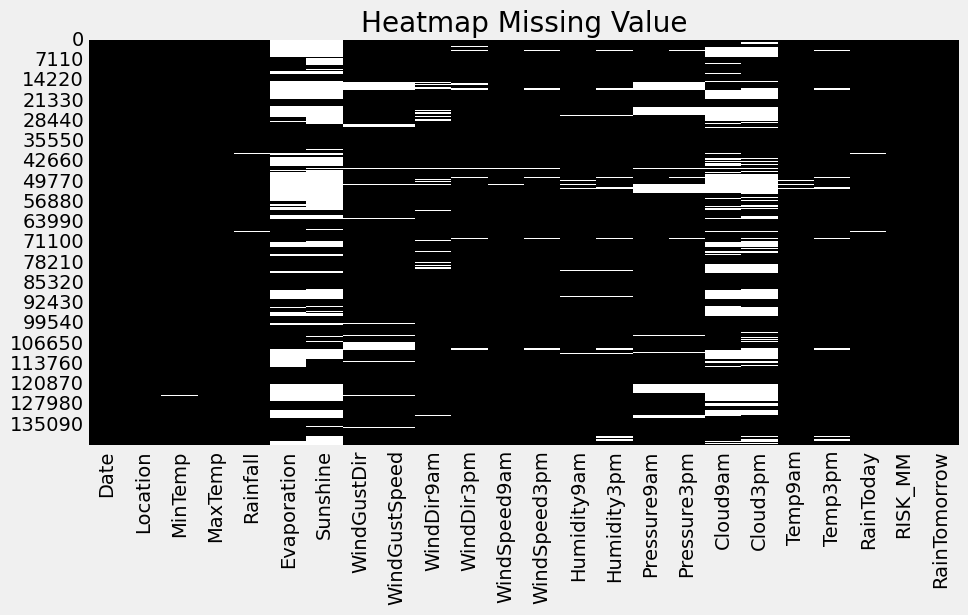

In [ ]:
'''
Visualisasi missing value seluruh variabel pada dataset yang digunakan.
Warna putih mengindikasikan missing value.

'''
plt.figure(figsize=(10,5))
sns.heatmap(cuaca_aus.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()


####2.2 Handling Missing Value

######2.2.1 Drop Variable

* Pada variabel Sunshine mengandung missing value dengan presentase menginjak 50% (tepatnya 48%) dari total dataset yang dimiliki. Saya memutuskan untuk menghapus/drop variabel Sunshine dari dataset. Menurut saya variabel yang mengandung missing value diatas 45% presentase-nya sudah tidak tepat jika di imputasi dengan nilai mean/median, dikarenakan jika diisi dengan nilai melalui pendekatan pada data yang ada di variabel tersebut, akibatnya sejumlah besar data berisi nilai yang tidak tepat/sesuai dengan fakta yang ada di lapangan. Yang mana akan mempengaruhi performa model, jika model dilatih dengan data yang tidak tepat dalam jumlah yang banyak. Juga variabel sunshine tidak memiliki pengaruh yang begitu besar dalam proses terjadinya hujan.
* Variabel MinTemp dan MaxTemp, saya memutuskan untuk menghapus/drop kedua variabel tersebut. Dikarenakan jika diimputasi dengan nilai melalui pendekatan pada data yang ada di kedua variabel tersebut, akibatnya terjadi ketidak sesuaian data, karena nilai pada variabel MinTemp dan MaxTemp dtentukan berdasarkan nilai yang ada variabel Temp9am dan Temp3pm.

In [ ]:
'''
Drop variabel Sunshine, MinTemp dan MaxTemp

'''

drop_columns = cuaca_aus.drop(['Sunshine', 'MinTemp', 'MaxTemp'], axis = 1)
cuaca_aus = drop_columns
cuaca_aus.shape

(142193, 21)

In [ ]:
'''
Drop Rows dengan missing value pada kolom RainToday dan RainTomorrow

'''

drop_rows = cuaca_aus.dropna( how='any',
                              subset=['Rainfall', 'RainToday', 'RainTomorrow'])
cuaca_aus = drop_rows
cuaca_aus.shape

(140787, 21)

######2.2.2 Imputasi


*   Pada variabel Evaporation, Cloud9am dan Cloud3pm mengandung missing value dengan presentase diatas 38%. Saya memutuskan untuk mengimputasi ketiga variabel ini dengan nilai mean/median disesuaikan dengan distribusi datanya. Dikarenakan nilai yang dikandung dalam ketiga variabel (Evaporasi, keadaan awan di pagi dan sore hari) ini merupakan nilai yang penting karena merupakan faktor penentu yang terlibat langsung dalam proses terjadinya hujan.
* RainFall, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm mengandung missing value dengan presentase di bawah 10%

IMPUTASI AKAN DILAKUKAN PADA PART PREPROCESSING DATA SETELAH DATA DI SPLIT

##2. Data Exploring/Exploratory Data Analysis (EDA)

###2.1 Visualize Fitur Target

<Axes: ylabel='count'>

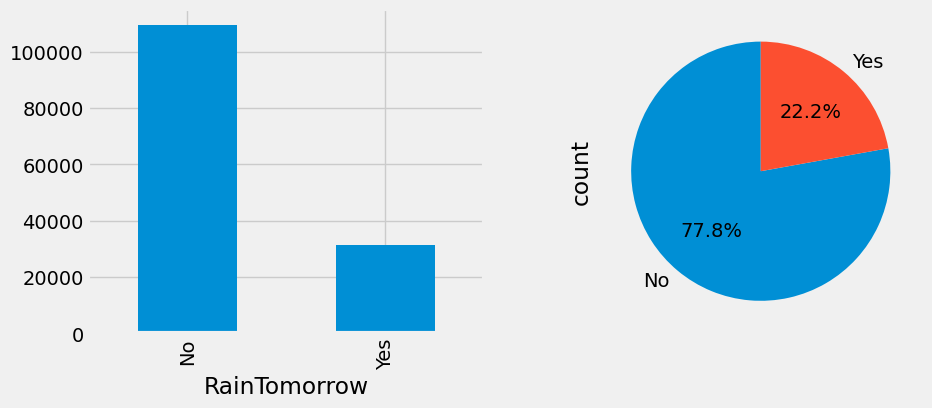

In [ ]:
'''
Visualisasi variabel target (RainTomorrow)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
cuaca_aus['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
cuaca_aus['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel RainTomorrow memiliki 2 value, yaitu Yes and No
*   77.8% dari hasilnya adalah No, dan 22.2% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu dihandle sebelum masuk ke train model

###2.2 Exploring The Data

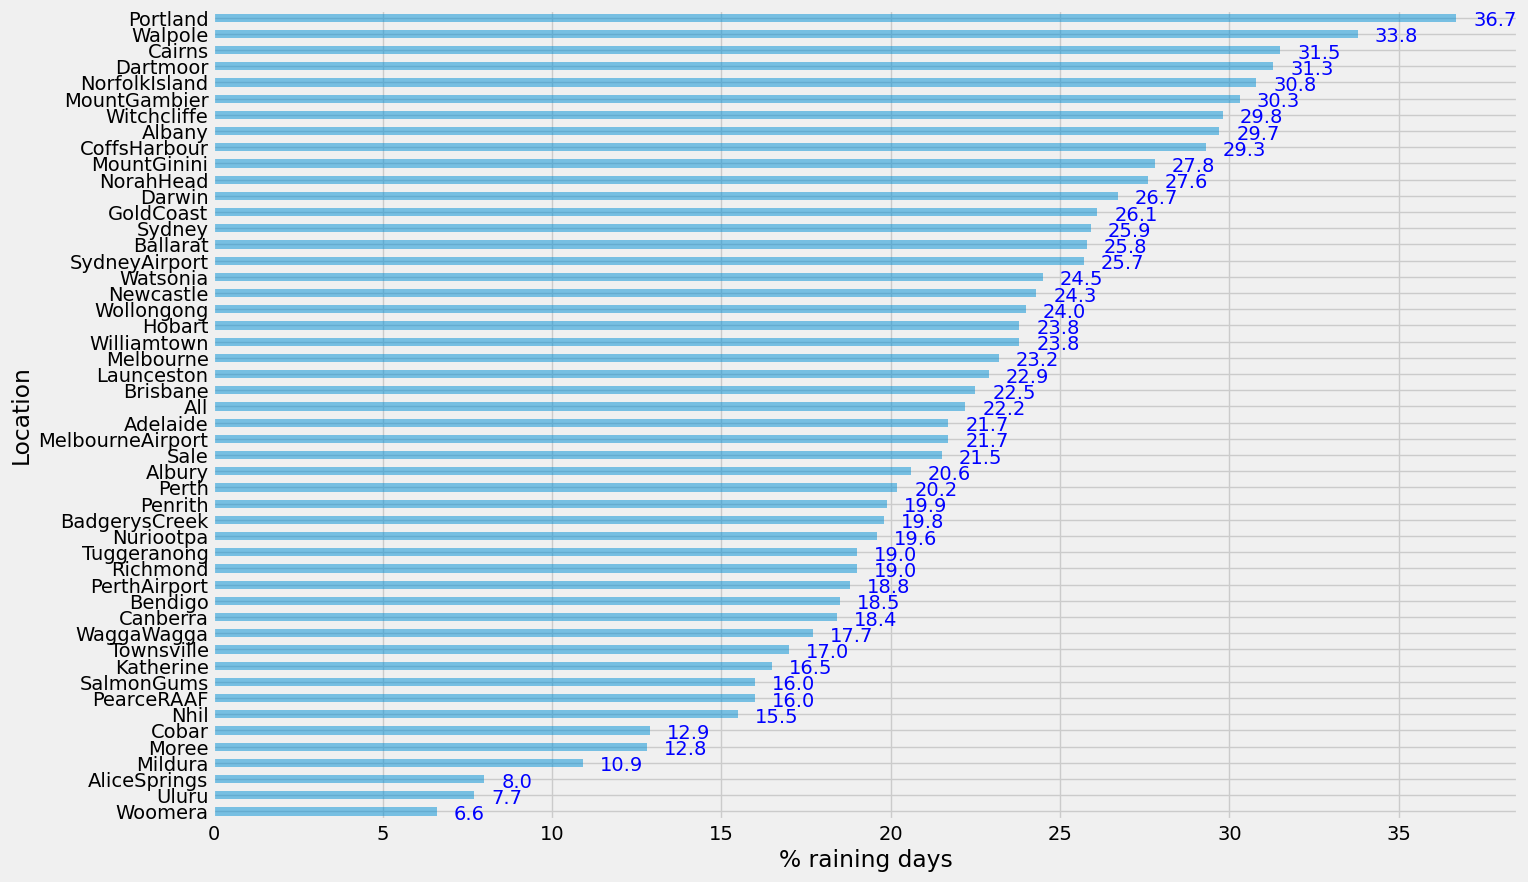

In [ ]:
'''
Kota mana yang intensitas hujannya lebih sering?

'''

#rain_by_location =rain.groupby('Location')['RainTomorrow'].count()/rain['Location'].count()
rain_by_location = pd.crosstab(index=cuaca_aus['Location'], columns=cuaca_aus['RainTomorrow'], values=cuaca_aus['RainTomorrow'], aggfunc='count', margins=True)
rain_by_location['% Yes'] = (rain_by_location['Yes']/rain_by_location['All']).round(3)*100
# rain_by_location.sort_values(by='% Yes', ascending=False)
f, ax = plt.subplots(figsize=(15,10))
rain_by_location['% Yes'].sort_values().plot(kind='barh', alpha=0.5)
ax.set_xlabel ('% raining days')

# Label values
y = rain_by_location['% Yes'].sort_values().values
for h, v in enumerate(y):
    ax.text(v+0.5 , h-0.5 , round(float(v),1), color='blue')

*   Kota dengan intensitas hujan lebih sering adalah **Portland**
*   Kota dengan intensitas hujan terendah adalah **Woomera**

<Axes: xlabel='Humidity9am', ylabel='Pressure9am'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


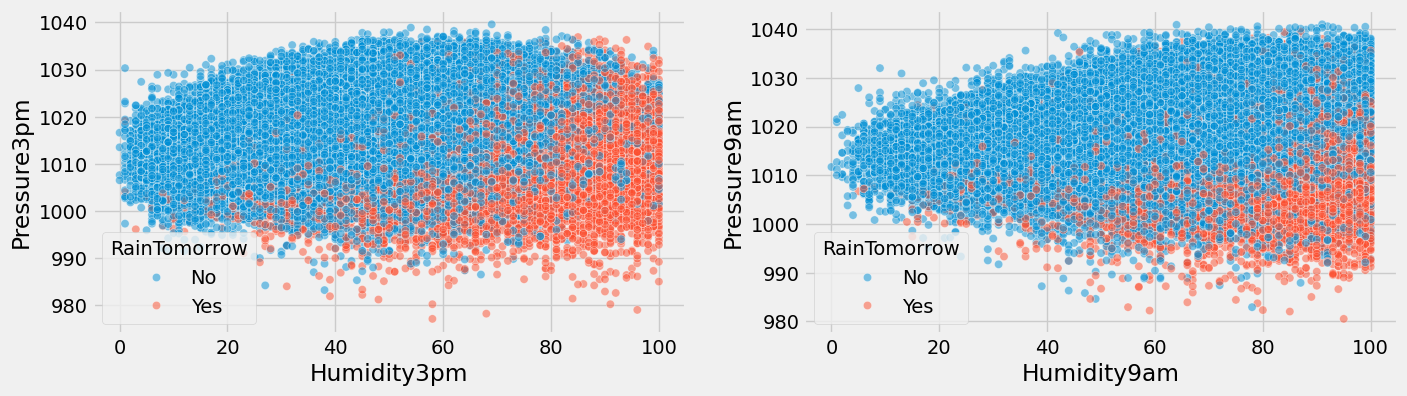

In [ ]:
'''
Visualisasi hubungan antara kelembapan, tekanan dan hujan di besok hari

'''

fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Humidity3pm', y='Pressure3pm', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Humidity9am', y='Pressure9am', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Dari hasil visualisasi tampaknya peluang turunnya hujan di besok hari semakin besar jika kelembapannya tinggi dan tekanannya rendah

<Axes: xlabel='Evaporation', ylabel='Cloud3pm'>

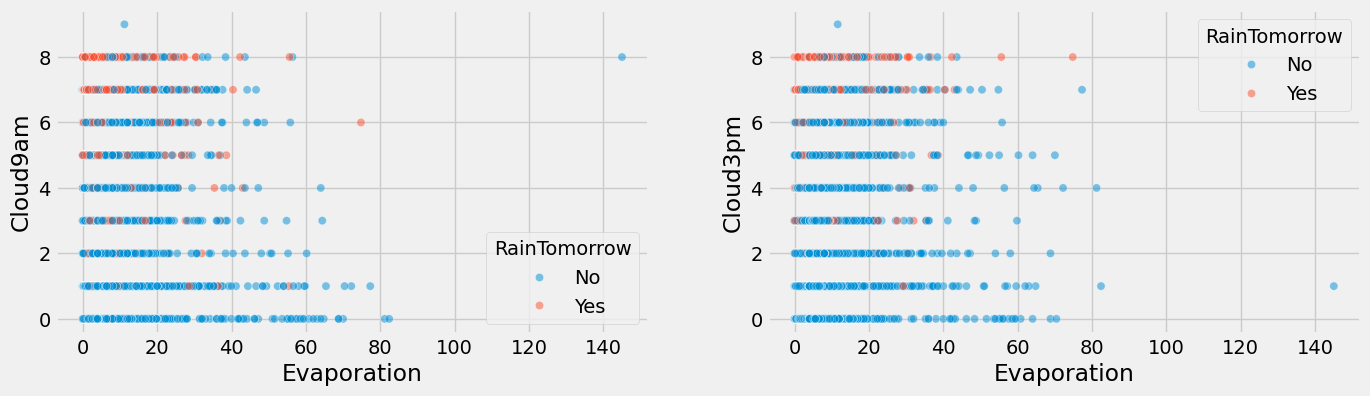

In [ ]:
'''
Visualisasi hubungan antara kelembapan, tekanan dan hujan di besok hari

'''

fig, axs = plt.subplots(1,2,figsize=(15, 4))
sns.scatterplot(x='Evaporation', y='Cloud9am', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[0])
sns.scatterplot(x='Evaporation', y='Cloud3pm', data=cuaca_aus, hue='RainTomorrow', alpha=0.5, ax=axs[1])

Dari hasil visualisasi tampaknya peluang turunnya hujan di besok hari semakin besar jika Evaporasi tinggi dan Banyaknya gumpalan awan juga tinggi

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


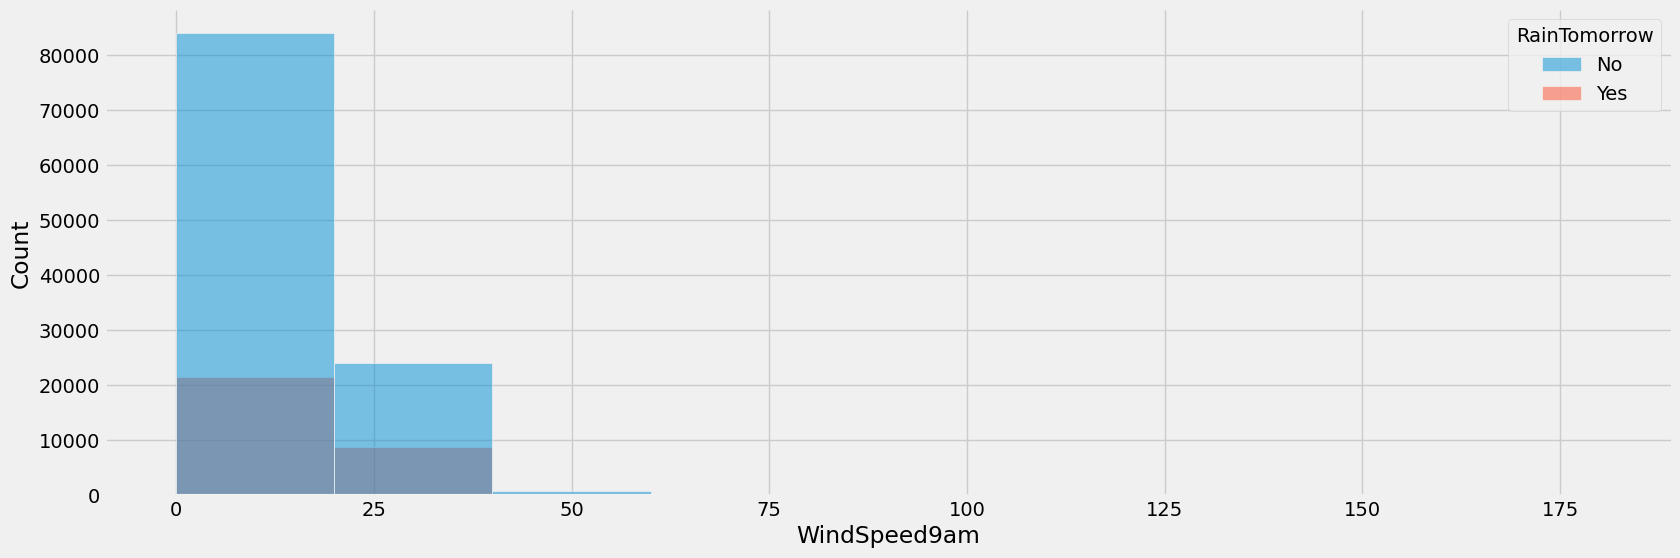

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="WindSpeed9am", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


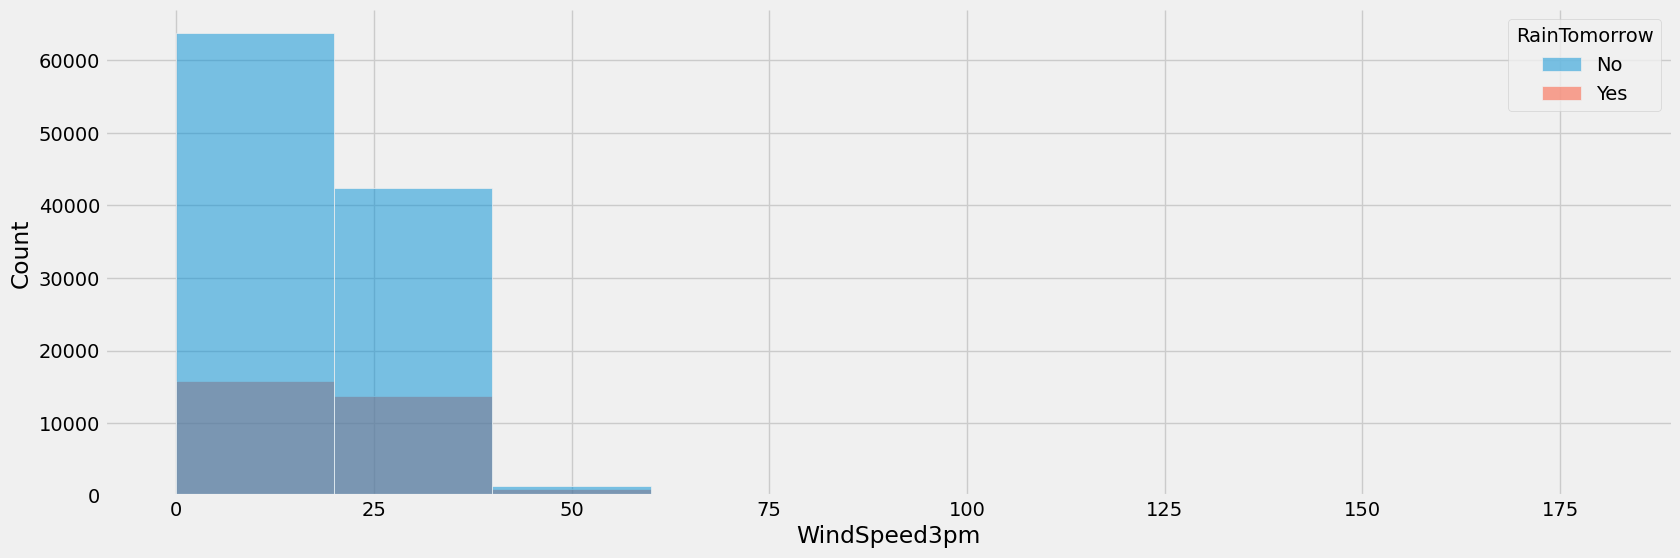

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="WindSpeed3pm", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


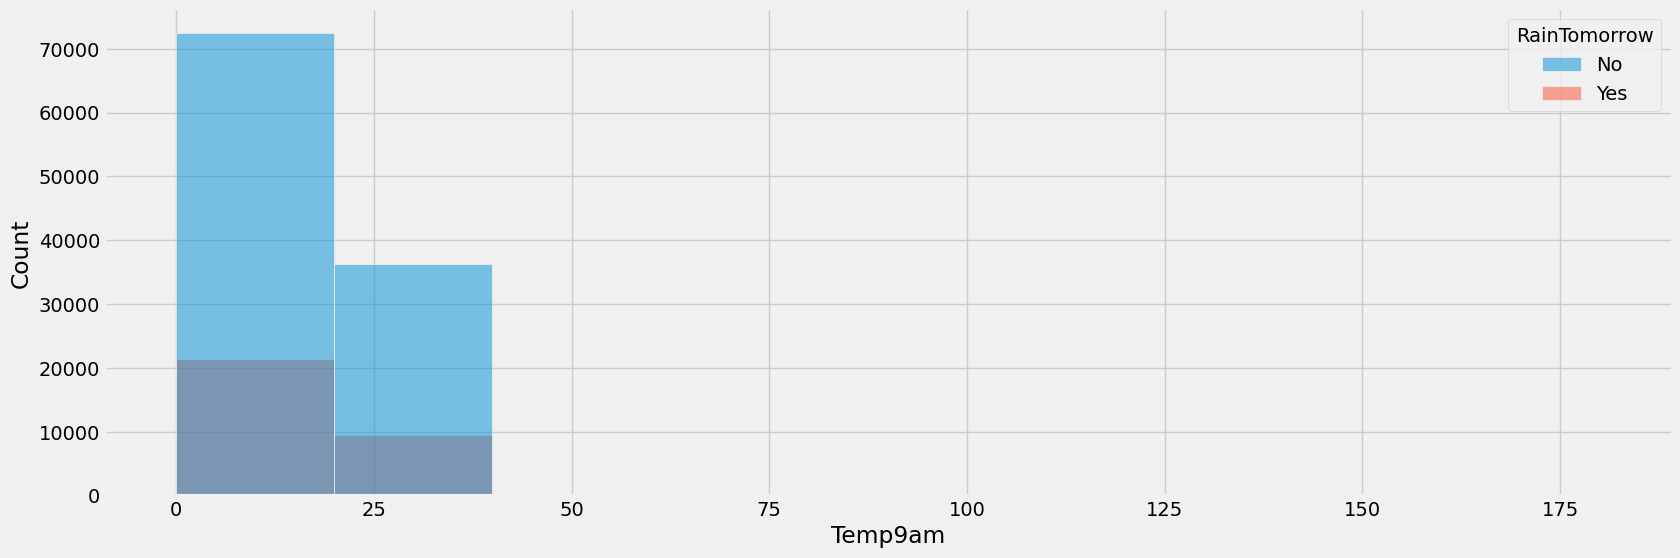

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="Temp9am", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


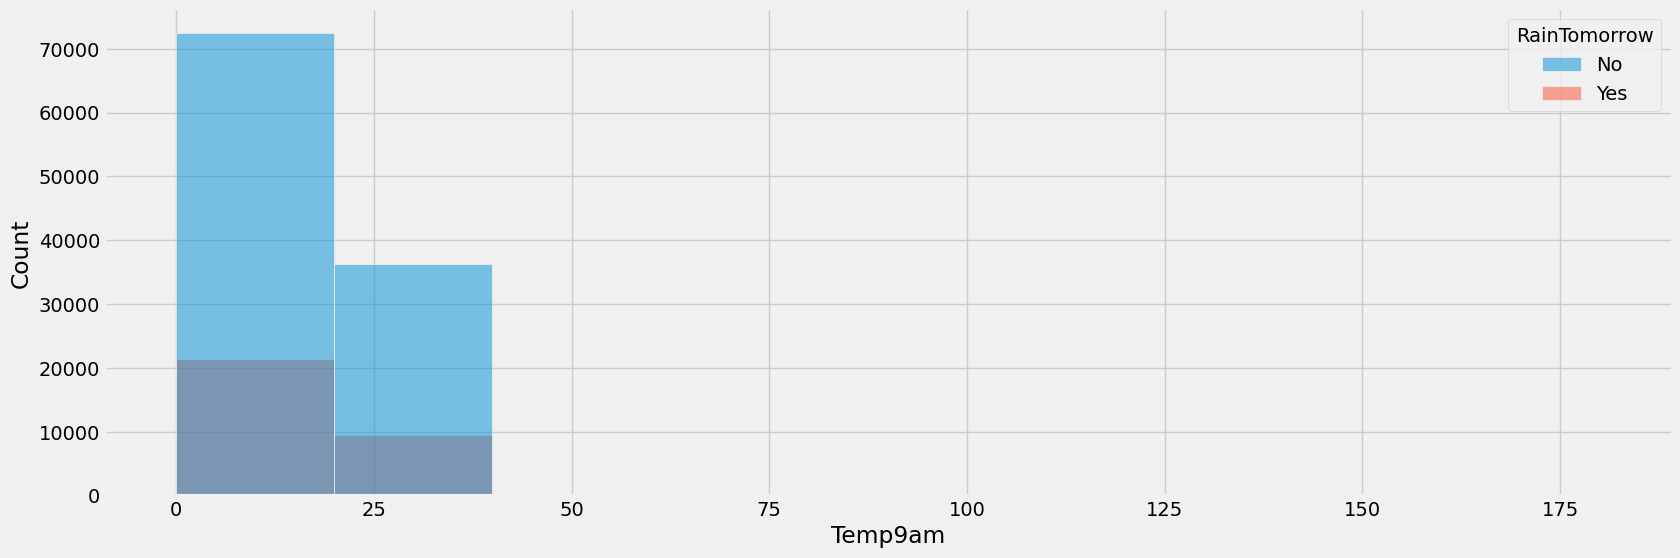

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plt.figure(figsize=(18, 6))
sns.histplot(data=cuaca_aus, x="Temp9am", bins=bins, hue="RainTomorrow");
sns.despine(top=True, right=True)

In [ ]:
both_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='Yes') & (cuaca_aus['RainTomorrow']=='Yes')]
both_not_rain =  cuaca_aus.loc[(cuaca_aus['RainToday']=='No') & (cuaca_aus['RainTomorrow']=='No')]
today_rain_tmr_not_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='Yes') & (cuaca_aus['RainTomorrow']=='No')]
today_not_rain_tmr_rain = cuaca_aus.loc[(cuaca_aus['RainToday']=='No') & (cuaca_aus['RainTomorrow']=='Yes')]
rain_tmr = cuaca_aus.loc[cuaca_aus['RainTomorrow']=='Yes']

print('both_days_rain:', both_rain['Date'].count())
print('both_days_not_rain:',  both_not_rain['Date'].count())
print('today_rain_tmr_not_rain:', today_rain_tmr_not_rain ['Date'].count())
print('today_not_rain_tmr_rain:', today_not_rain_tmr_rain ['Date'].count())
print('rain_tmr:', rain_tmr['Date'].count())

both_days_rain: 14597
both_days_not_rain: 92728
today_rain_tmr_not_rain: 16858
today_not_rain_tmr_rain: 16604
rain_tmr: 31201


*   14597 nilai dari kondisi hujan berdampingan selama 2 hari
*   Dari informasi ini dapat disimpulkan bahwa jika hari ini hujan, kemungkinan besar besok juga akan turun hujan

<ipython-input-19-a4155d6b47e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuaca_aus['Year'] = pd.DatetimeIndex(cuaca_aus['Date']).year
<ipython-input-19-a4155d6b47e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuaca_aus['Month'] = pd.DatetimeIndex(cuaca_aus['Date']).month


Text(0, 0.5, '% Raining days')

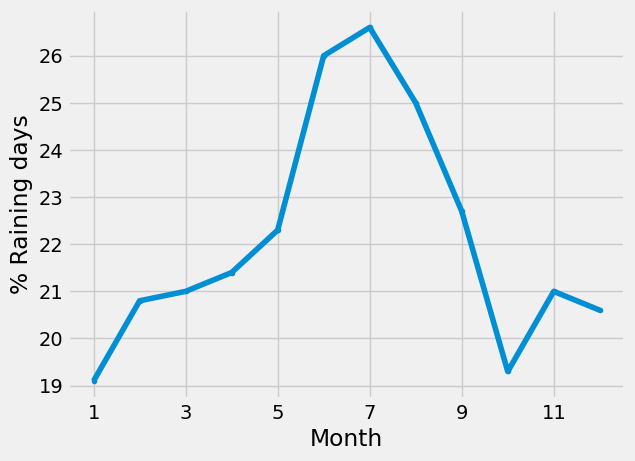

In [ ]:
# Extract `Year` and 'Month' information from Date
cuaca_aus['Year'] = pd.DatetimeIndex(cuaca_aus['Date']).year
cuaca_aus['Month'] = pd.DatetimeIndex(cuaca_aus['Date']).month

rain_month = pd.crosstab(index=cuaca_aus['Month'], columns=cuaca_aus['RainTomorrow'], margins=True)
rain_month['%Yes'] = (rain_month['Yes'] / rain_month['All']).round(3)*100
rain_month.iloc[:-1,-1].plot(style='.-')
plt.xlabel('Month')
plt.ylabel('% Raining days')

Dari hasil visualisasi terlihat bahwa intensitas hujan lebih sering turun ada pada rentang bulan Juni hingga mendekati Agustus

###2.3 Kesimpulan EDA

Kemungkinan besar turun hujan besok, jika:

*   Tingkat kelembapan tinggi (Humidity)
*   Tingkat tekanan rendah (Pressure)
* Evaporasi Tinggi
* Keadaan gumpalan awan banyak
*   Hari ini turun hujan
*   Bulan Juni, Juli, Agustus.





In [ ]:
'''
Drop variabel Date

'''

drop_columns = cuaca_aus.drop(['Date', 'Year'], axis = 1)
cuaca_aus = drop_columns
cuaca_aus.shape

(140787, 21)

##3. Data Preprocessing

Action item based on data-preparation and data-exploration finding:
1. Split Dataset with Stratified Cross Validation method to handle imbalanced feature target
2. Checking & handling outlier
3. There's some variables we need to impute in this section, we have to find the way to fill the missing value (mean or median) based on variables distribution

###3.1 Memisahkan Fitur Target, Numerik, dan Non Numerik

In [ ]:
'''
Mengubah type variabel RainTomorrow ke numerik agar bisa diliat korelasinya dalam
heatmap

'''

cuaca_aus['RainTomorrow'] = cuaca_aus['RainTomorrow'].map({'Yes' : 1, 'No' : 0})

In [ ]:
target = ['RainTomorrow']
cat_cols = ['Location', 'Month', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_cols = [i for i in cuaca_aus.columns if i not in (target + cat_cols)]

###3.2 Visualisasi Distribusi Data pada Fitur Numerik untuk Menemukan Cara Tepat Mengisi Nilai Imputasi Missing Value

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


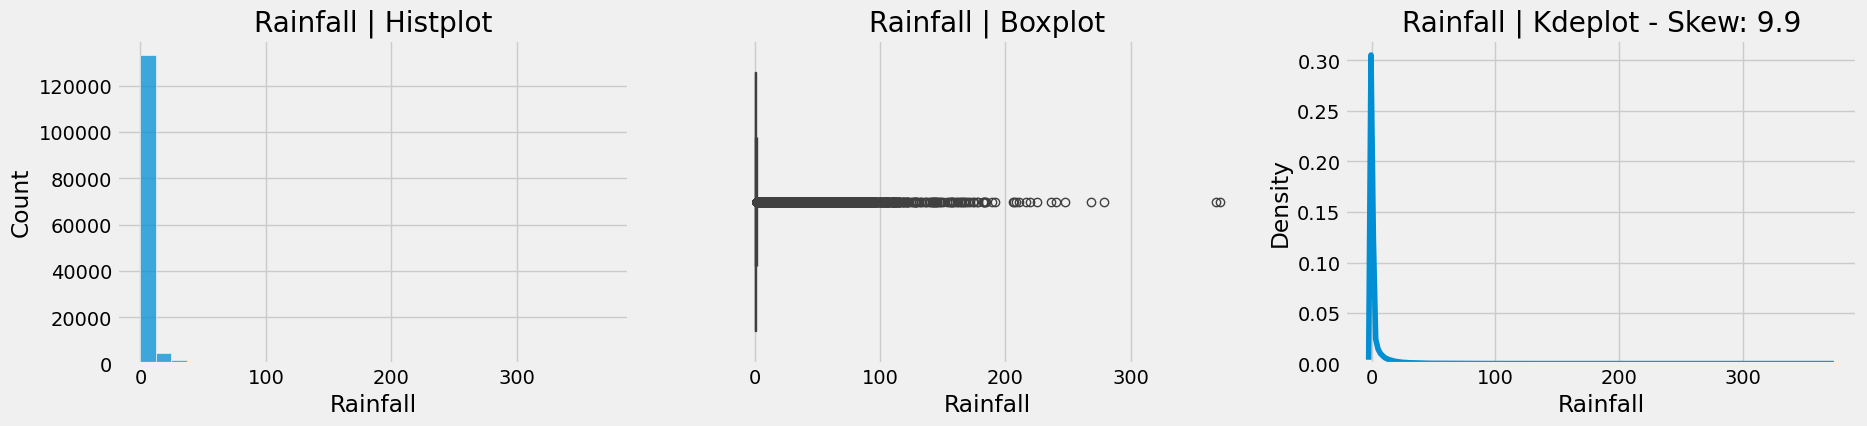

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


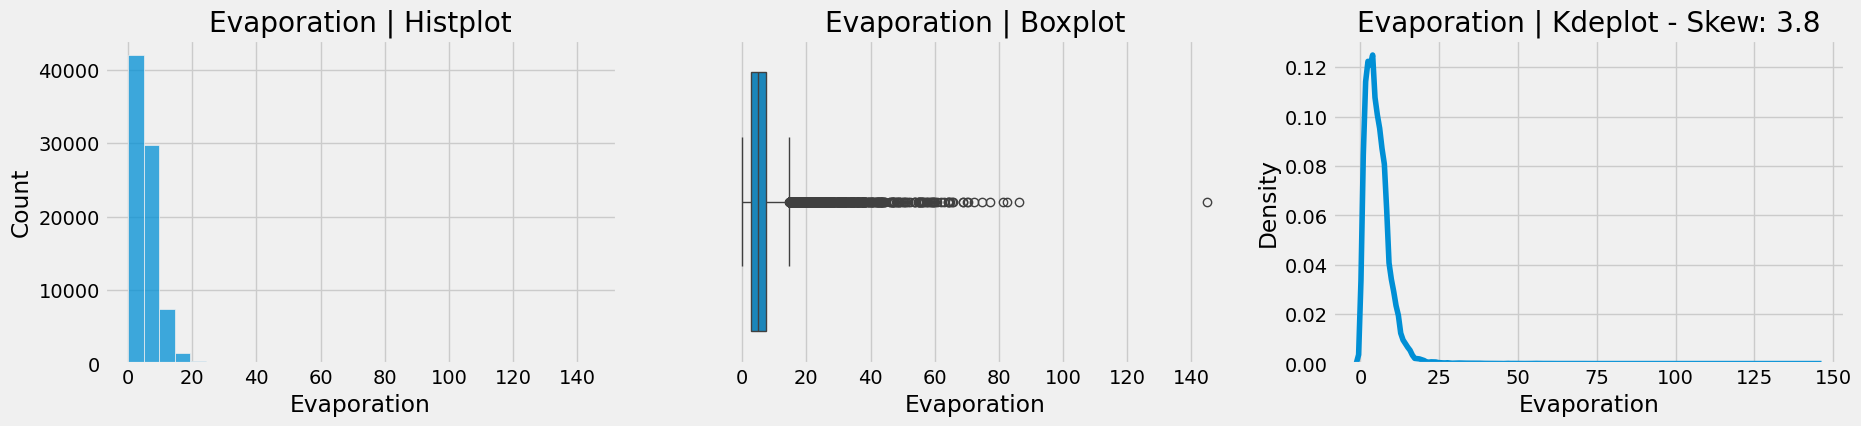

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


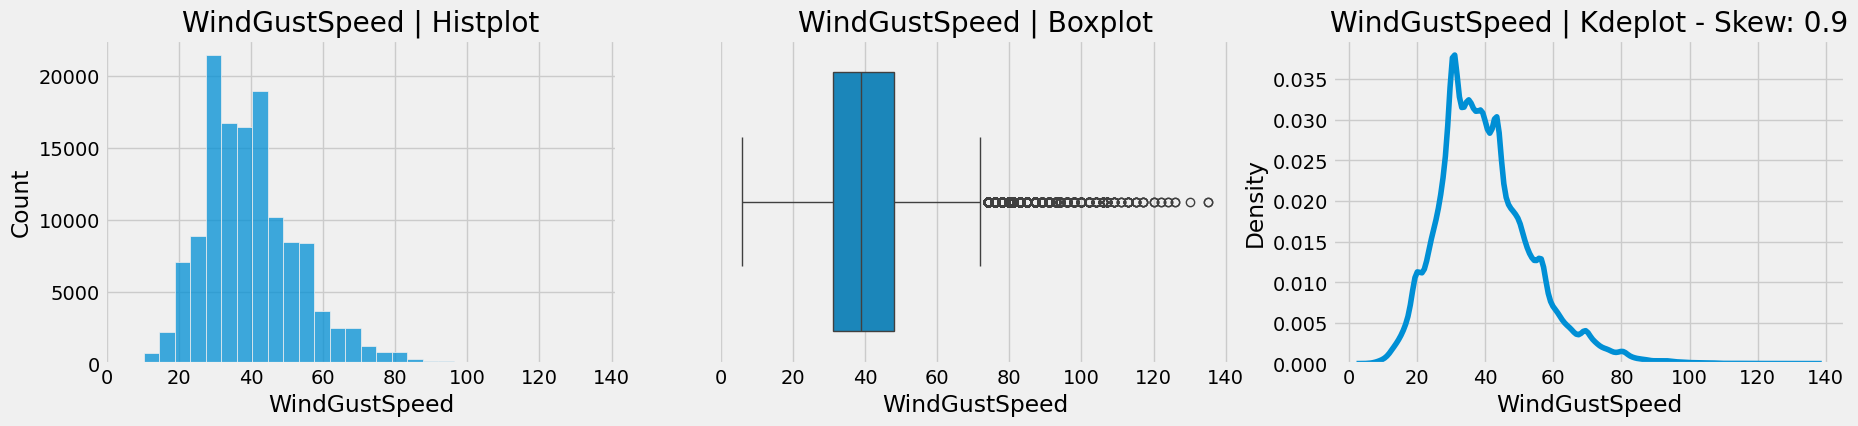

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


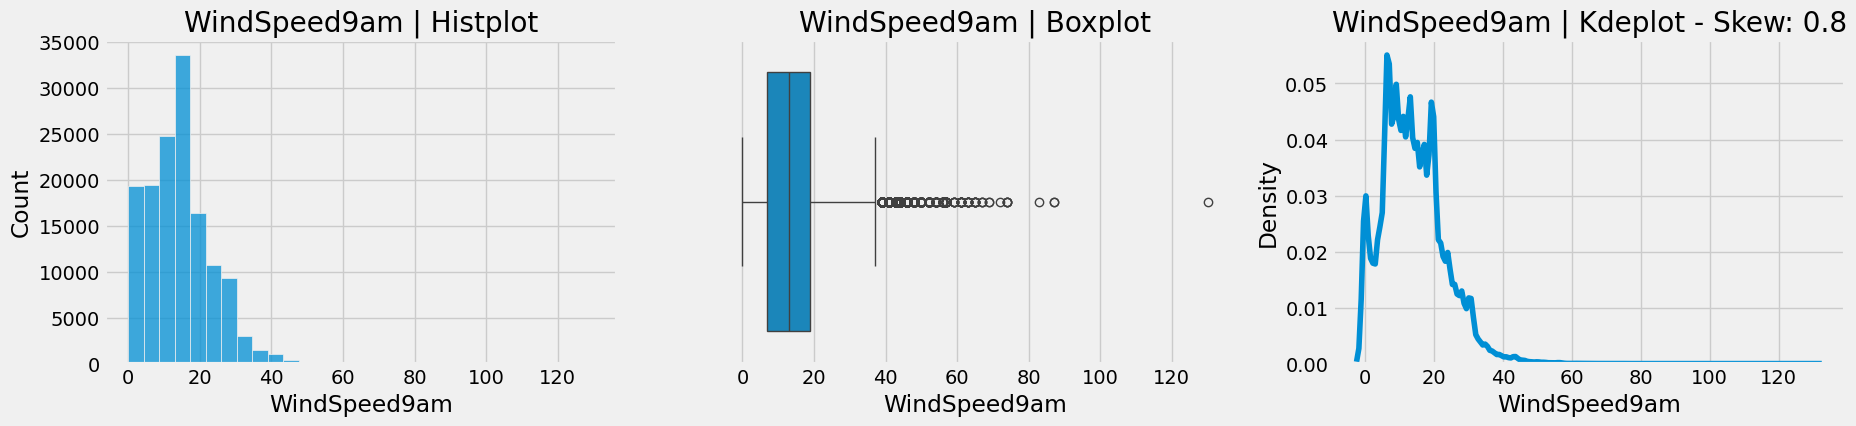

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


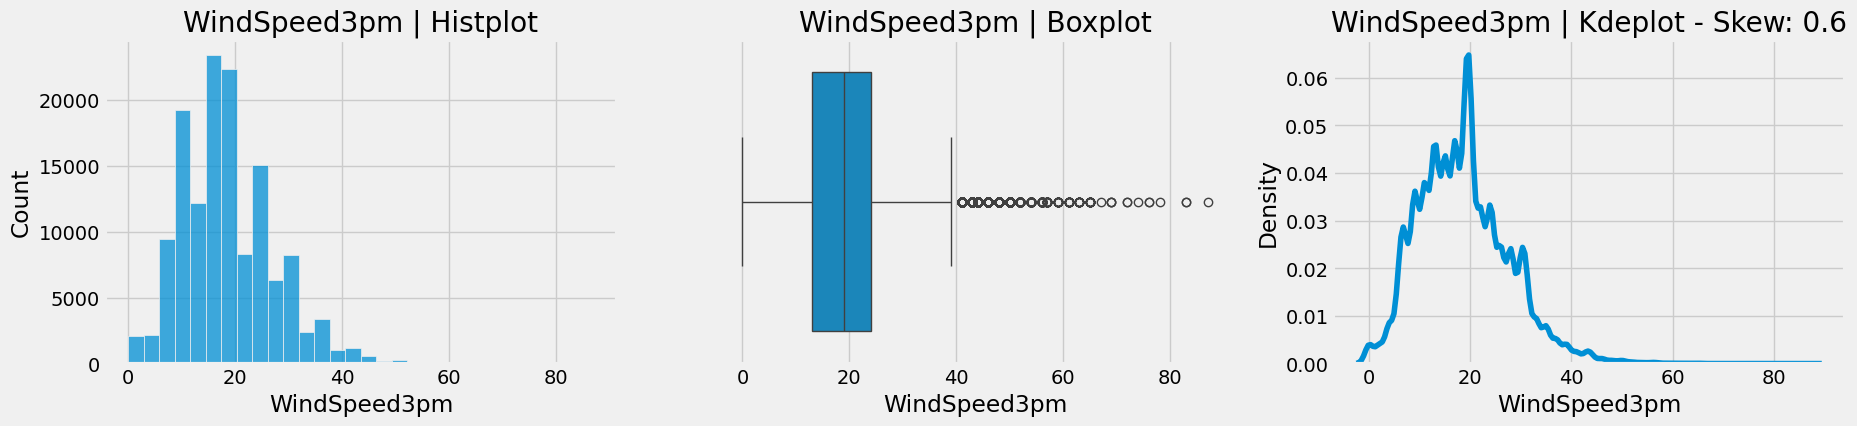

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


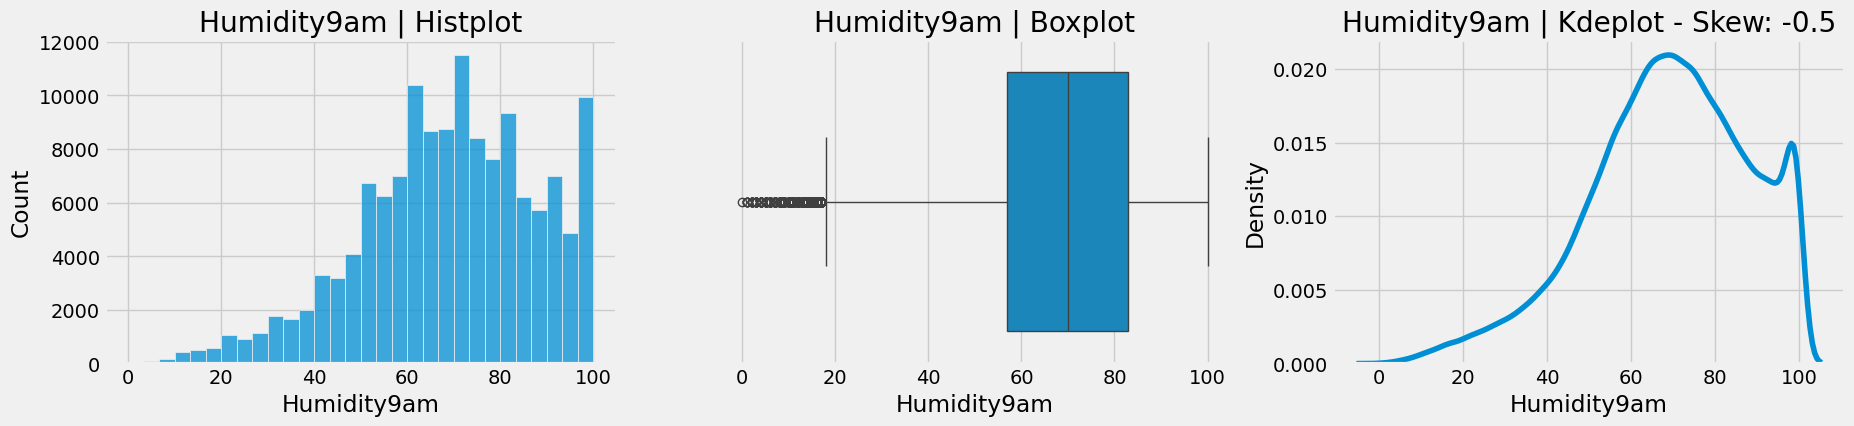

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


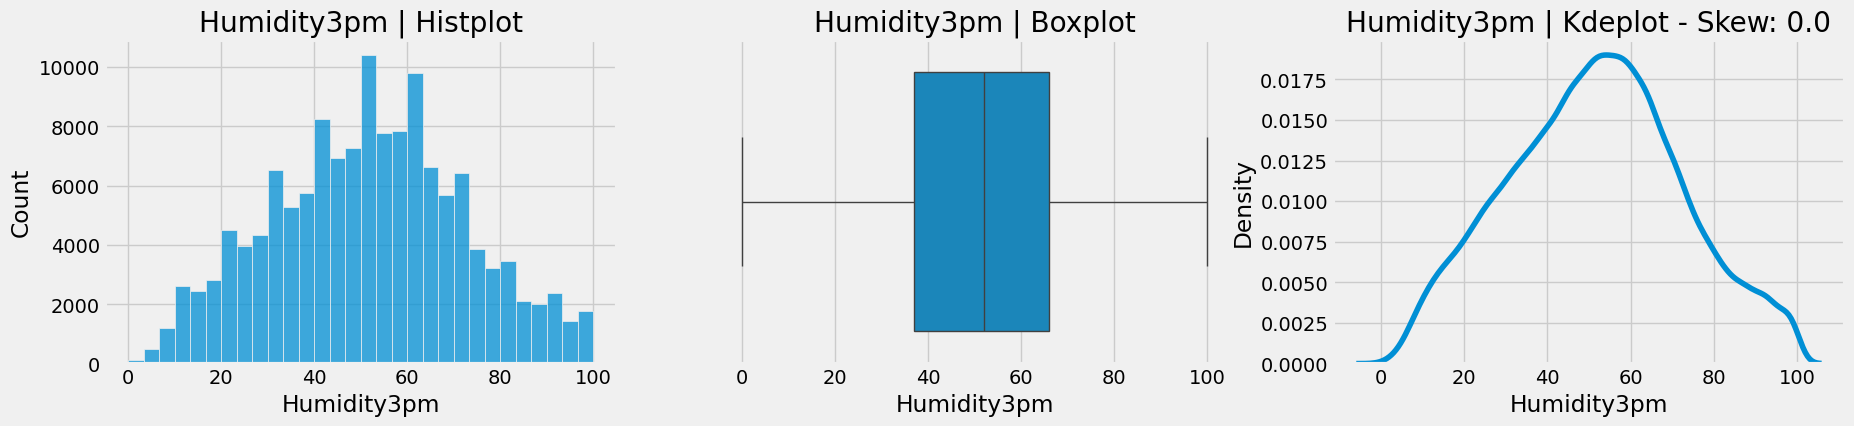

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


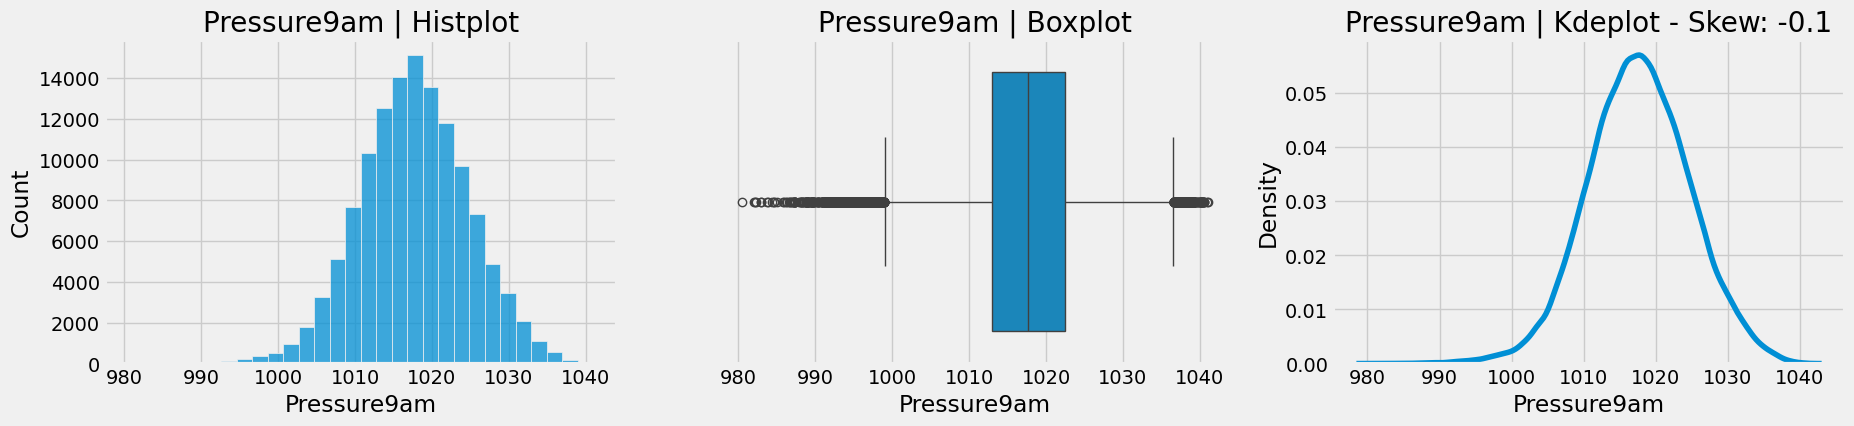

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


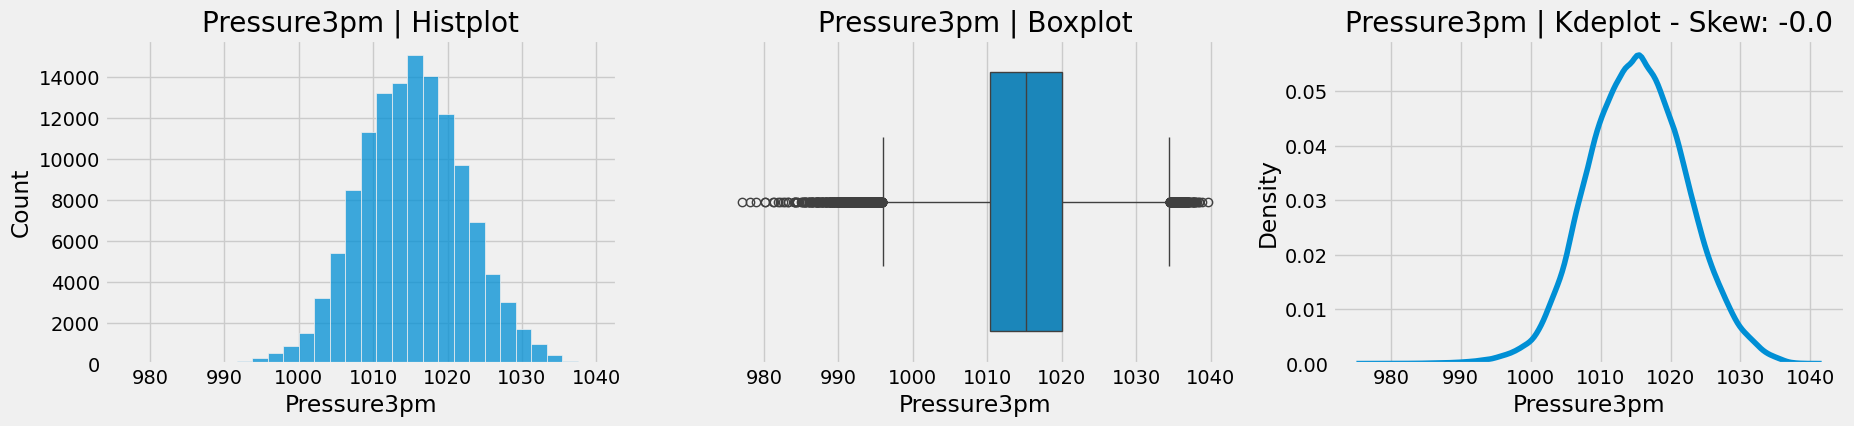

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


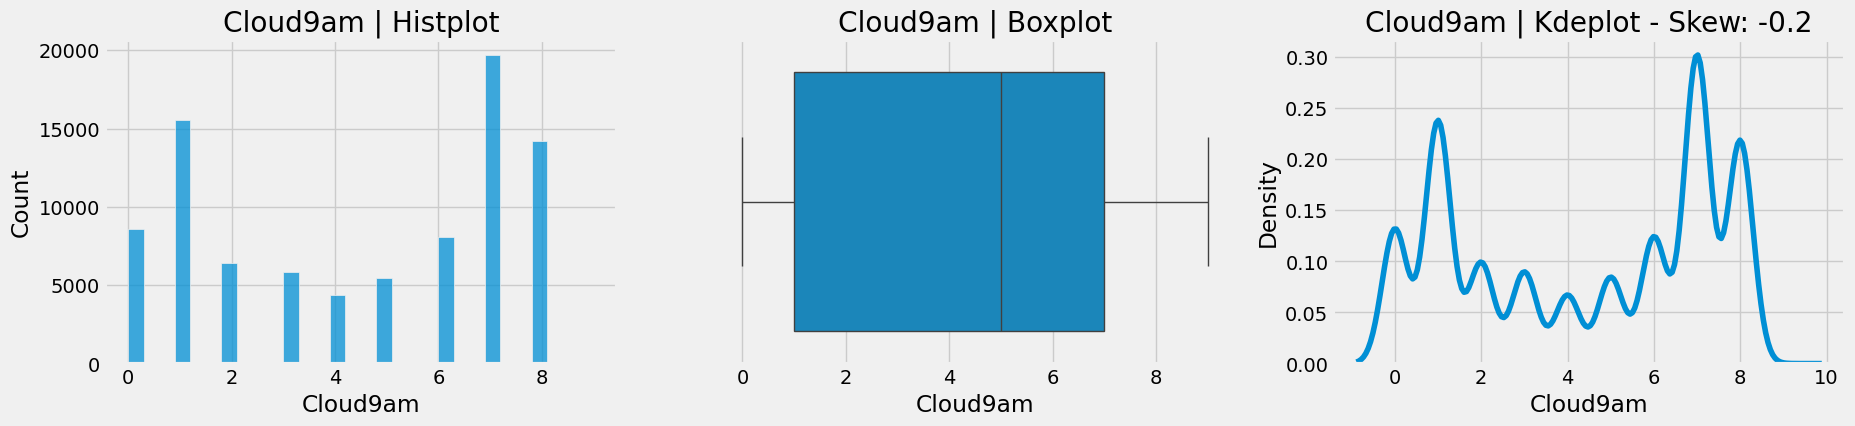

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


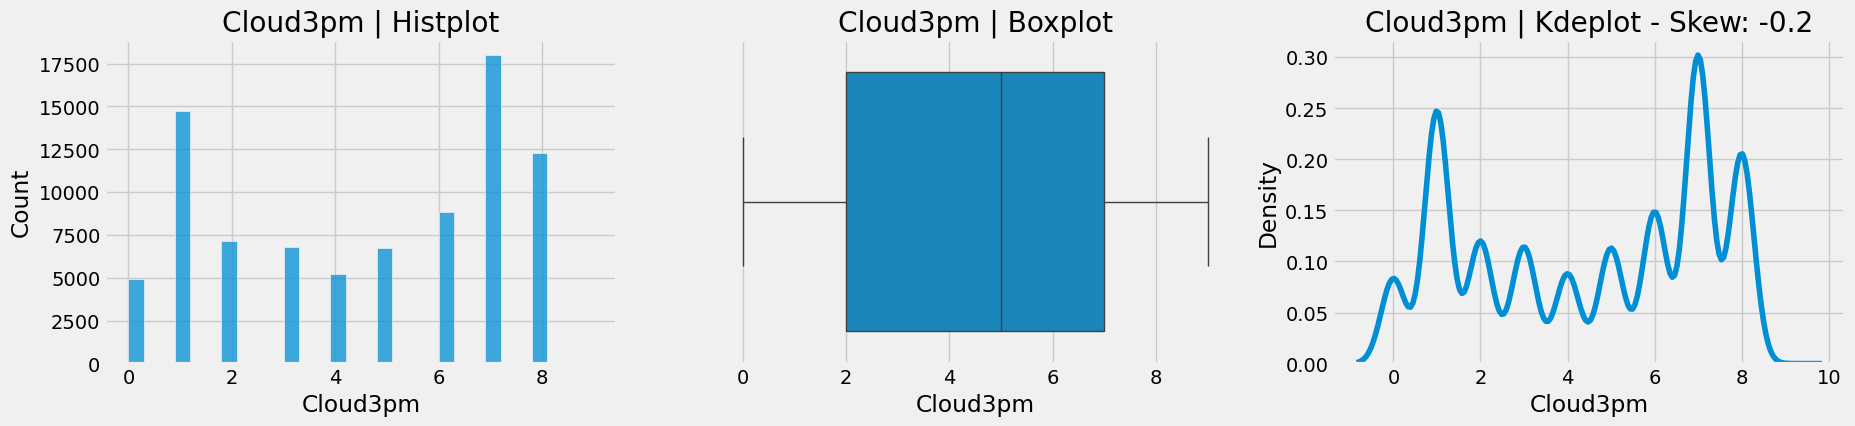

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


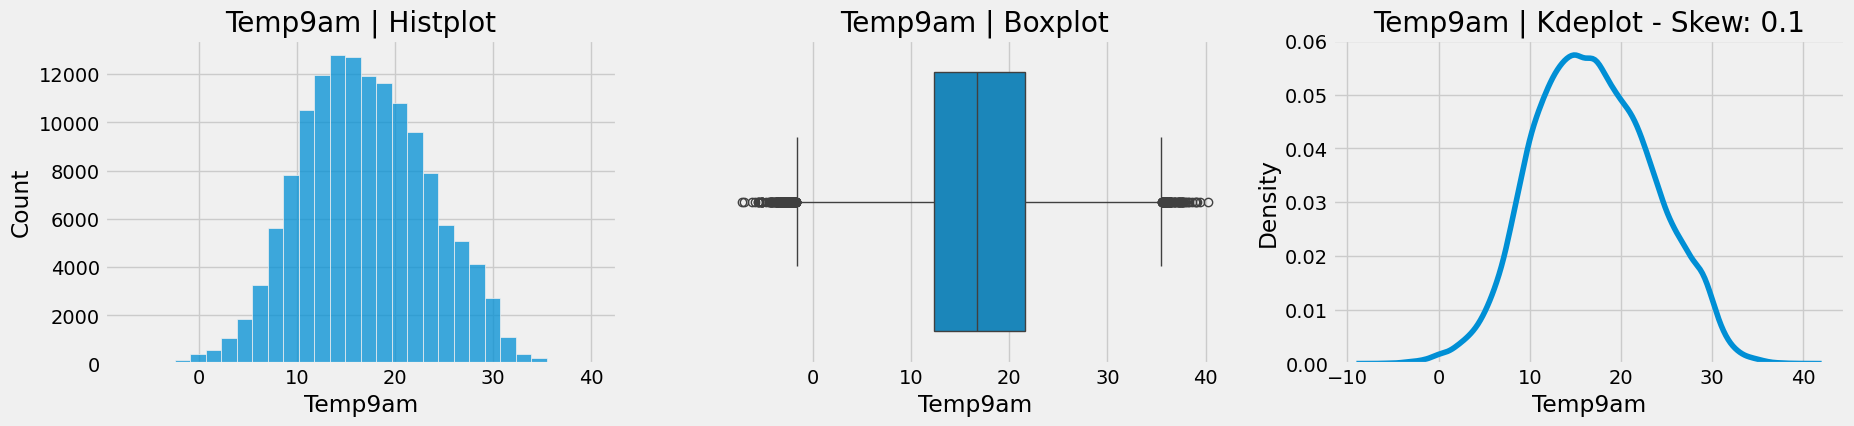

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


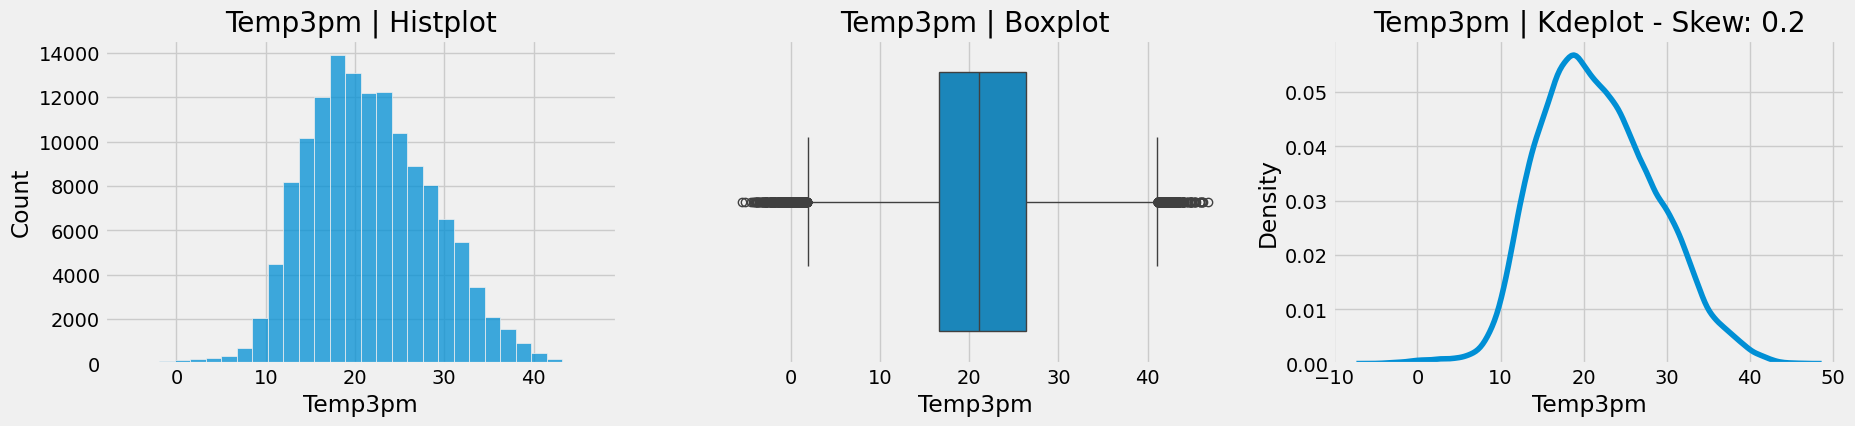

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


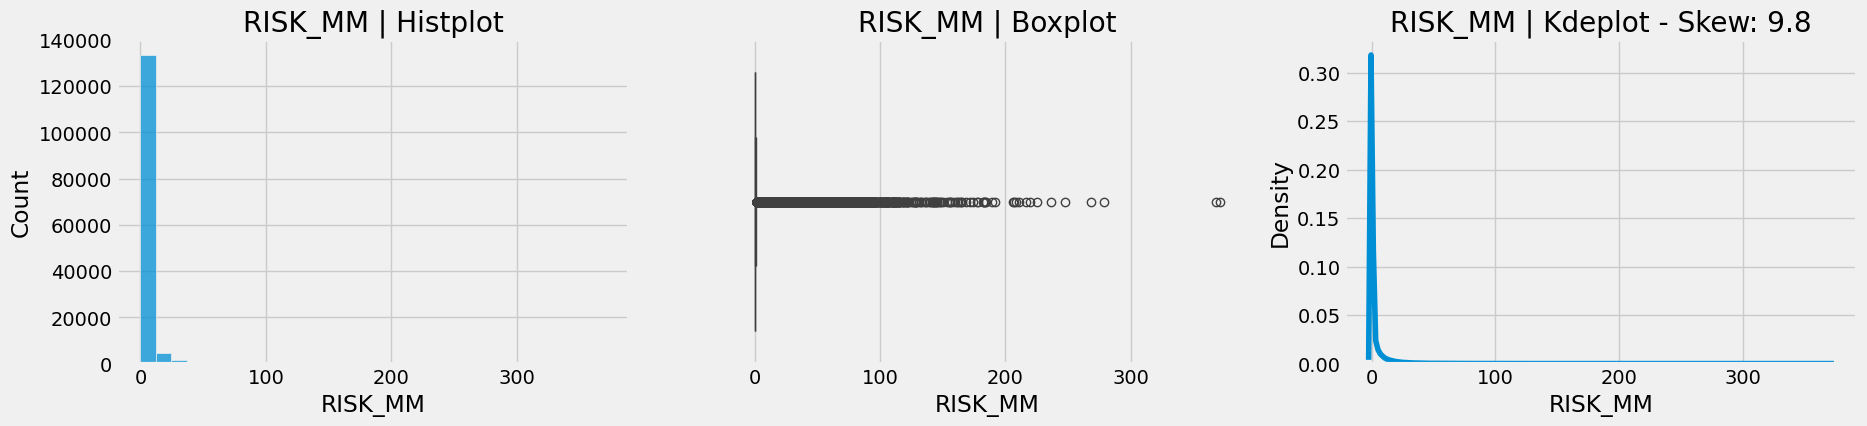

In [ ]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi fitur numerik yang
ditampilkan

'''


for i in cuaca_aus[num_cols].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=cuaca_aus[i],ax=ax[0], bins=30)
    sns.boxplot(x=cuaca_aus[i], ax=ax[1])
    sns.kdeplot(cuaca_aus[i], ax=ax[2])
    skew_val=round(cuaca_aus[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

Dari distribusi data pada fitur numerik, terlihat bahwa:


*   Variabel RainFall dan Evaporation memiliki distribusi data yang miring/skewed. Variabel lainnya memiliki distribusi data normal dan bimodel. Dari distribusi data pada fitur numerik dapat disimpulkan bahwa lebih tepat jika nilai missing value pada variabel RainFall dan Evaporation diimputasi dengan **median**
*   Terdapat banyak variabel yang mengandung outlier. Logistic Regression dan SVM sensitif terhadap outlier, sehingga saya memutuskan akan handle outlier dengan trimming jika presentase outliernya kurang dari 3% dan di capping jika presentase outlier diatas 3% - 25%, diatas 25% tidak akan saya lakukan treatment apapun.


###3.3 Matrix Correlation

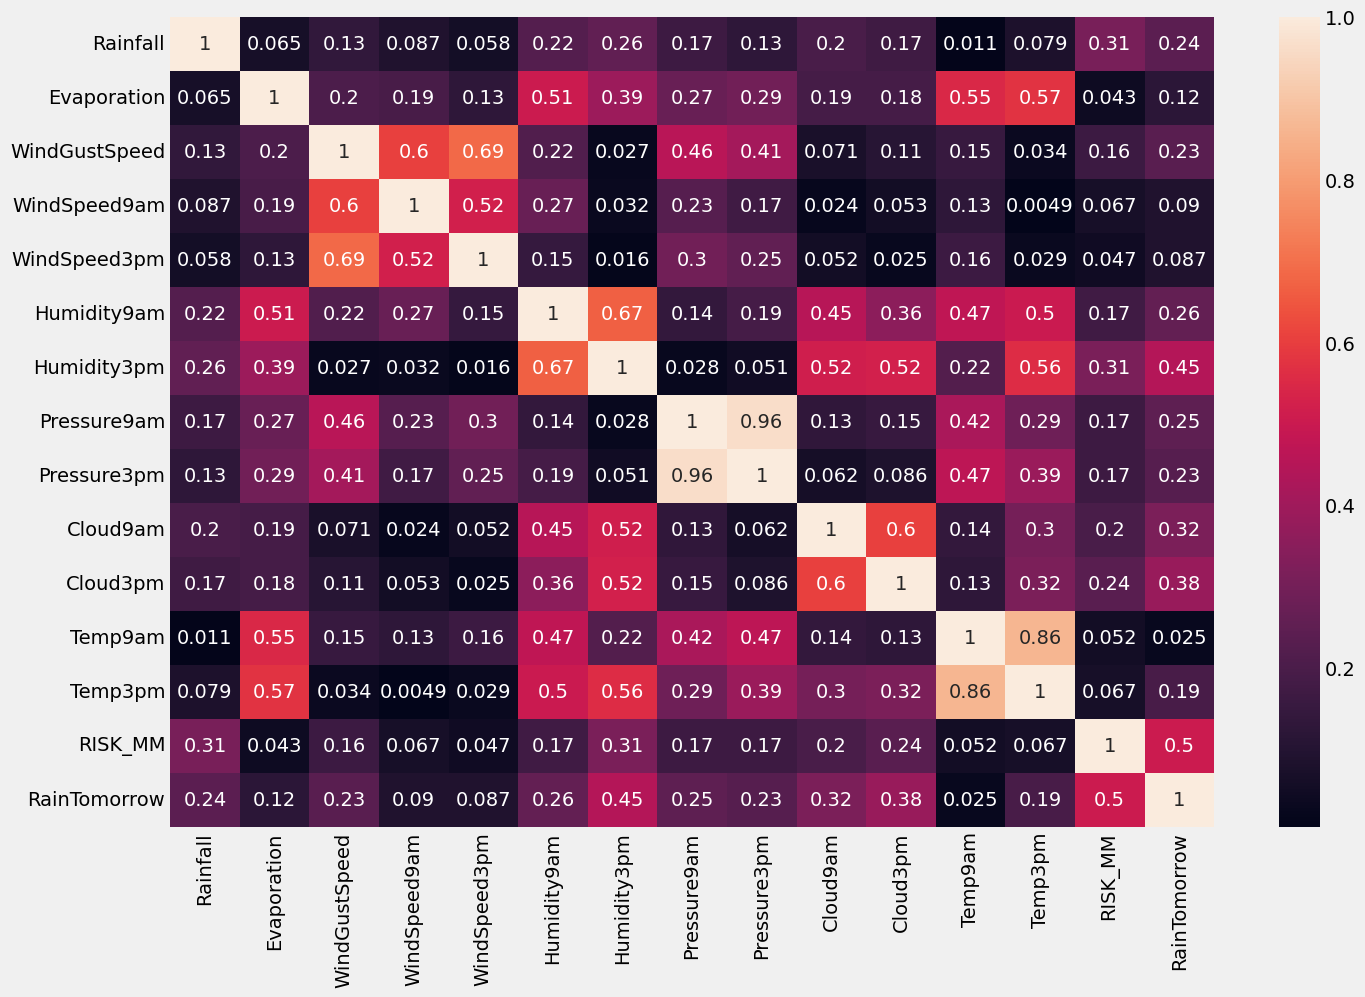

In [ ]:
'''
Heatmap untuk pengecekan correlation fitur numerik terhadap taget

'''

plt.figure(figsize=(15, 10))
sns.heatmap(cuaca_aus[num_cols + target].corr().abs(),  annot=True)
plt.show()

Based on Correlation Matrix we can see that:
* Humidity3pm, tinggi rendahnya kelembapan di sore hari memiliki korelasi cukup tinggi (0.45) terhadap turun hujan di besok hari
* Cloud3pm (0.38) dan Cloud9am (0.32), tebal tipisnya ketebalan awan hari ini memiliki korelasi terhadap turun hujan di besok hari
* Humidity9am, tinggi rendahnya kelembapan di pagi hari memiliki korelasi cukup tinggi (0.26) terhadap turun hujan di besok hari
* Pressure9am (0.25) & Pressure3pm (0.23) tinggi rendahnya tekanan hari ini  memiliki korelasi cukup tinggi terhadap turun hujan di besok hari
* Rainfall (0.24), WindGustSpeed (0.23), Temp3pm (0.19) & Evaporation (0.12) memiliki korelasi cukup tinggi terhadap turun hujan di besok hari


###3.4 Split Dataset

In [ ]:
X = cuaca_aus.drop('RainTomorrow', axis = 1)
y = cuaca_aus.RainTomorrow

In [ ]:
'''
Sebelum checking & handing outliernya saya akan convert terlebih dahulu fitur kategorik
dengan LabelEncoder agar memudahkan dalam handling outlier

'''
from sklearn.preprocessing import LabelEncoder

# Convert categorized values to numerical values
le = LabelEncoder()
X[cat_cols] = X[cat_cols].astype('str').apply(le.fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

###3.5 Checking & Handling Outlier

####3.5.1 Checking Outlier

In [ ]:
'''
Menampilkan presentasi outlier pada X_train

'''

for k, v in X_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Location outliers = 0.00%
Column Rainfall outliers = 18.59%
Column Evaporation outliers = 1.40%
Column WindGustDir outliers = 0.00%
Column WindGustSpeed outliers = 2.07%
Column WindDir9am outliers = 0.00%
Column WindDir3pm outliers = 0.00%
Column WindSpeed9am outliers = 1.62%
Column WindSpeed3pm outliers = 1.69%
Column Humidity9am outliers = 1.16%
Column Humidity3pm outliers = 0.00%
Column Pressure9am outliers = 0.84%
Column Pressure3pm outliers = 0.67%
Column Cloud9am outliers = 0.00%
Column Cloud3pm outliers = 0.00%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.50%
Column RainToday outliers = 100.00%
Column RISK_MM outliers = 20.08%
Column Month outliers = 0.00%


1. Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%
2. Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier
dengan presentase outlier sama dengan dan dibawah 3%

In [ ]:
'''
Menampilkan presentasi outlier pada X_test

'''

for k, v in X_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Location outliers = 0.00%
Column Rainfall outliers = 18.89%
Column Evaporation outliers = 1.33%
Column WindGustDir outliers = 0.00%
Column WindGustSpeed outliers = 2.23%
Column WindDir9am outliers = 0.00%
Column WindDir3pm outliers = 0.00%
Column WindSpeed9am outliers = 1.64%
Column WindSpeed3pm outliers = 1.81%
Column Humidity9am outliers = 1.09%
Column Humidity3pm outliers = 0.00%
Column Pressure9am outliers = 0.89%
Column Pressure3pm outliers = 0.66%
Column Cloud9am outliers = 0.00%
Column Cloud3pm outliers = 0.00%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.53%
Column RainToday outliers = 100.00%
Column RISK_MM outliers = 18.67%
Column Month outliers = 0.00%


###3.5.2 Handling Outlier

In [ ]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#####Caping X_train

In [ ]:
'''
Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%

Column Rainfall outliers = 18.59%

'''

!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['Rainfall'])

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)

In [ ]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Rainfall': -1.2000000000000002}
Right Tail Caps :  {'Rainfall': 2.0}


In [ ]:
print('Rainfall - Before Capping')
print(X_train.describe())
print('')
print('RainFall - After Capping')
print(X_train_t.describe())

Rainfall - Before Capping
            Location       Rainfall   Evaporation    WindGustDir  \
count  112629.000000  112629.000000  64813.000000  112629.000000   
mean       23.726269       2.343813      5.480516       8.253505   
std        14.241316       8.451856      4.224323       4.946491   
min         0.000000       0.000000      0.000000       0.000000   
25%        11.000000       0.000000      2.600000       4.000000   
50%        24.000000       0.000000      4.800000       9.000000   
75%        36.000000       0.800000      7.400000      13.000000   
max        48.000000     367.600000    145.000000      16.000000   

       WindGustSpeed     WindDir9am     WindDir3pm   WindSpeed9am  \
count  105343.000000  112629.000000  112629.000000  111790.000000   
mean       39.946726       7.900283       7.966900      13.987235   
std        13.559718       4.900227       4.726918       8.886329   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.00

Rain Fall - Before Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


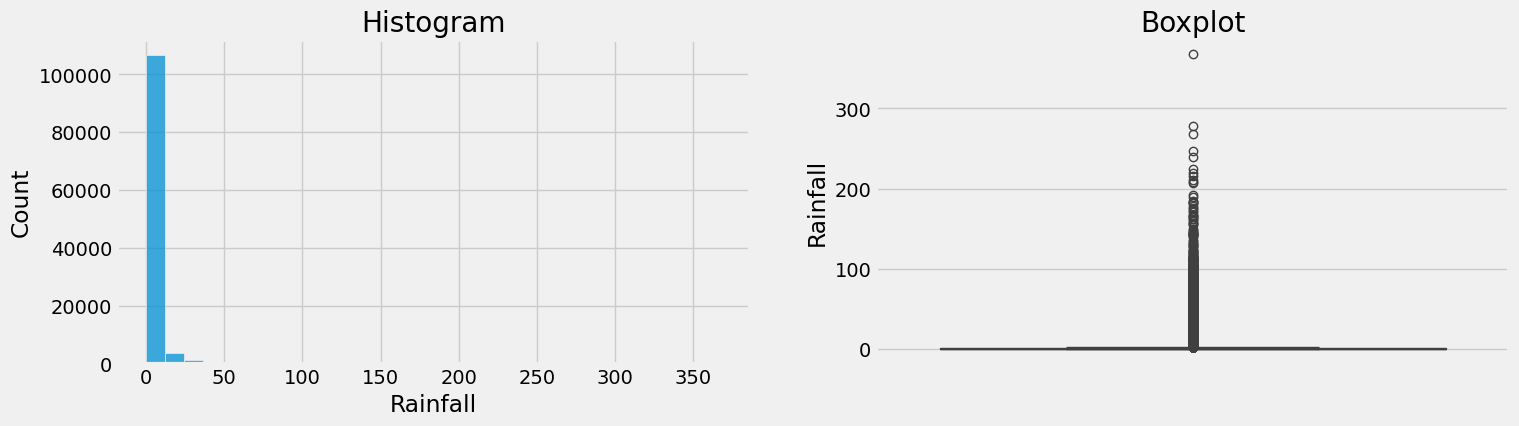

\Rain Fall - After Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


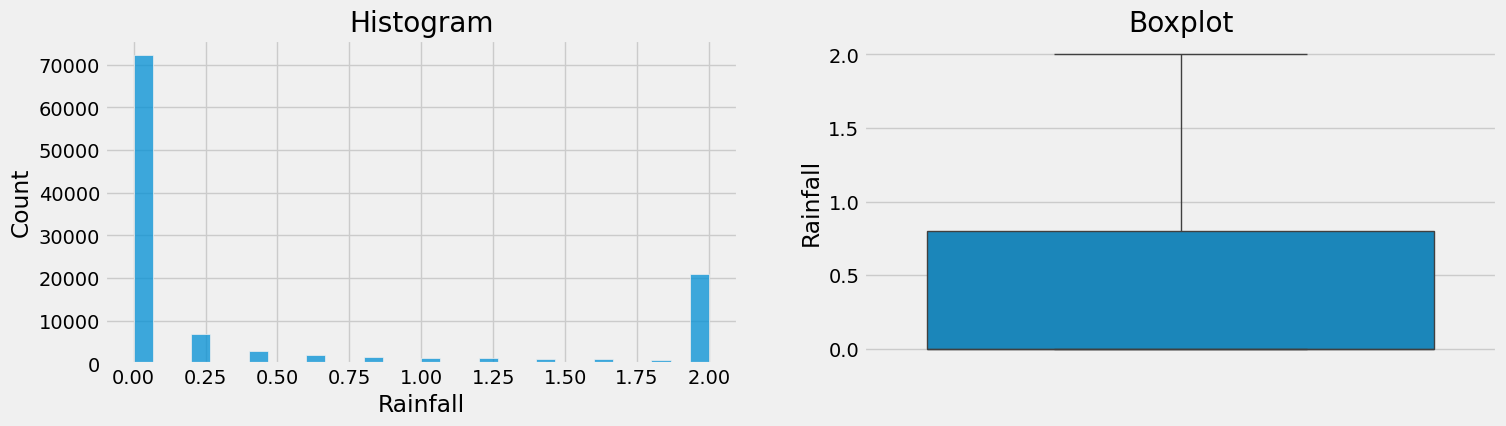

In [ ]:
print('Rain Fall - Before Capping')
diagnostic_plots(X_train, 'Rainfall')
print('\Rain Fall - After Capping')
diagnostic_plots(X_train_t, 'Rainfall')

#####Capping X_test

In [ ]:
'''
Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%

Column Rainfall outliers = 18.89%

'''

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['Rainfall'])

windsoriser.fit(X_test)

X_test_t = windsoriser.transform(X_test)

In [ ]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Rainfall': -1.2000000000000002}
Right Tail Caps :  {'Rainfall': 2.0}


In [ ]:
print('Rainfall - Before Capping')
print(X_test.describe())
print('')
print('RainFall - After Capping')
print(X_test_t.describe())

Rainfall - Before Capping
           Location      Rainfall   Evaporation   WindGustDir  WindGustSpeed  \
count  28158.000000  28158.000000  16280.000000  28158.000000   26339.000000   
mean      23.695291      2.374618      5.440663      8.230343      40.065682   
std       14.201921      8.518339      4.045965      4.965170      13.651719   
min        0.000000      0.000000      0.000000      0.000000       7.000000   
25%       11.000000      0.000000      2.600000      4.000000      31.000000   
50%       24.000000      0.000000      4.800000      9.000000      39.000000   
75%       36.000000      0.800000      7.400000     13.000000      48.000000   
max       48.000000    371.000000     68.800000     16.000000     135.000000   

         WindDir9am    WindDir3pm  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  28158.000000  28158.000000  27942.000000  27646.000000  27850.000000   
mean       7.889658      7.973471     14.003543     18.659806     68.867469   
std        4.914

Rain Fall - Before Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


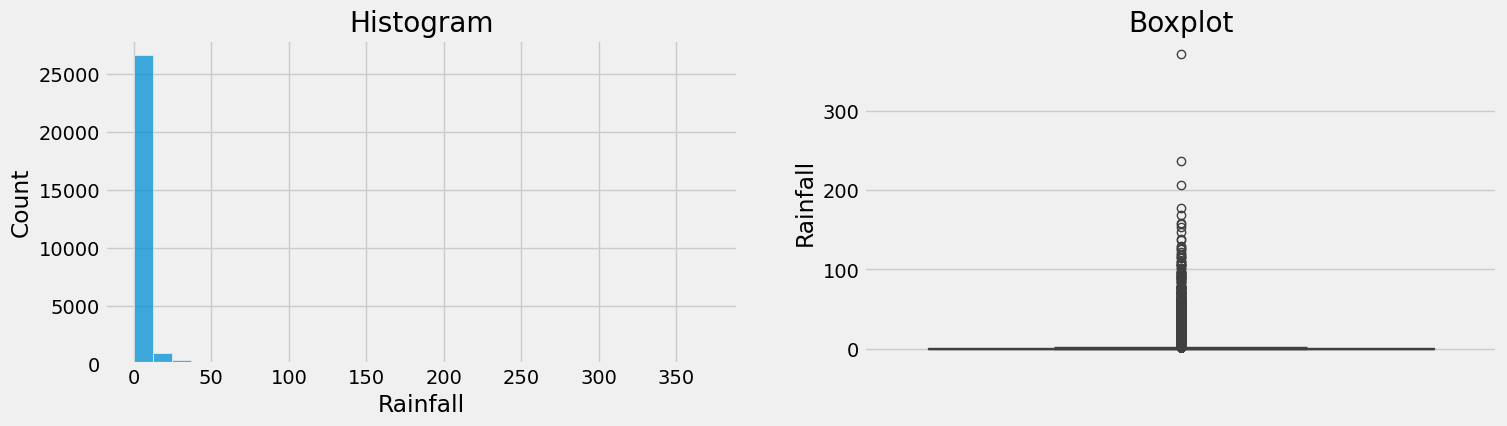

\Rain Fall - After Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


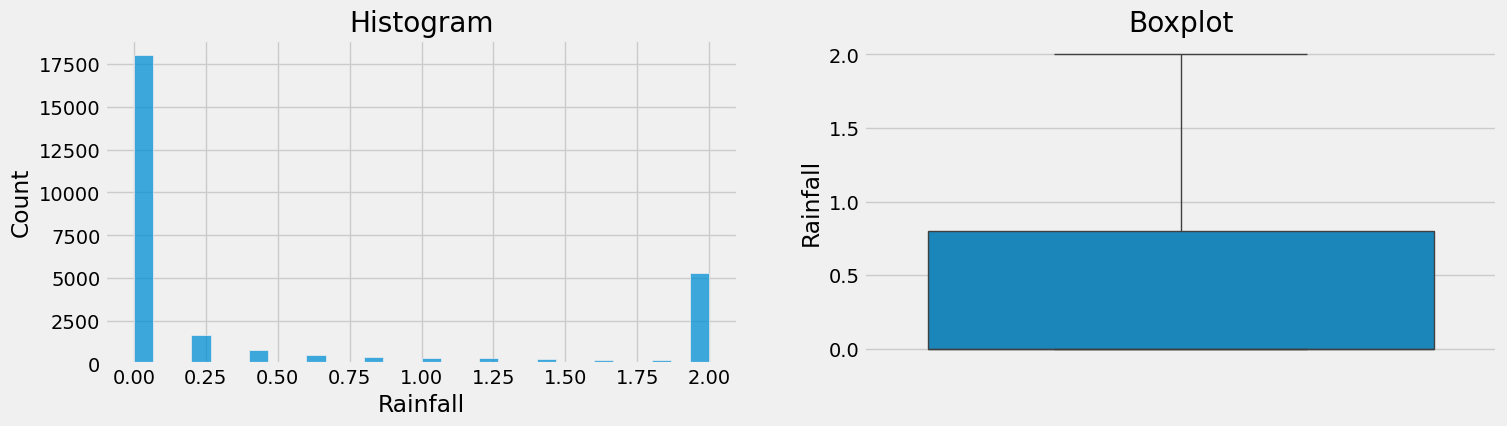

In [ ]:
print('Rain Fall - Before Capping')
diagnostic_plots(X_test, 'Rainfall')
print('\Rain Fall - After Capping')
diagnostic_plots(X_test_t, 'Rainfall')

#####Trimming X_train

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


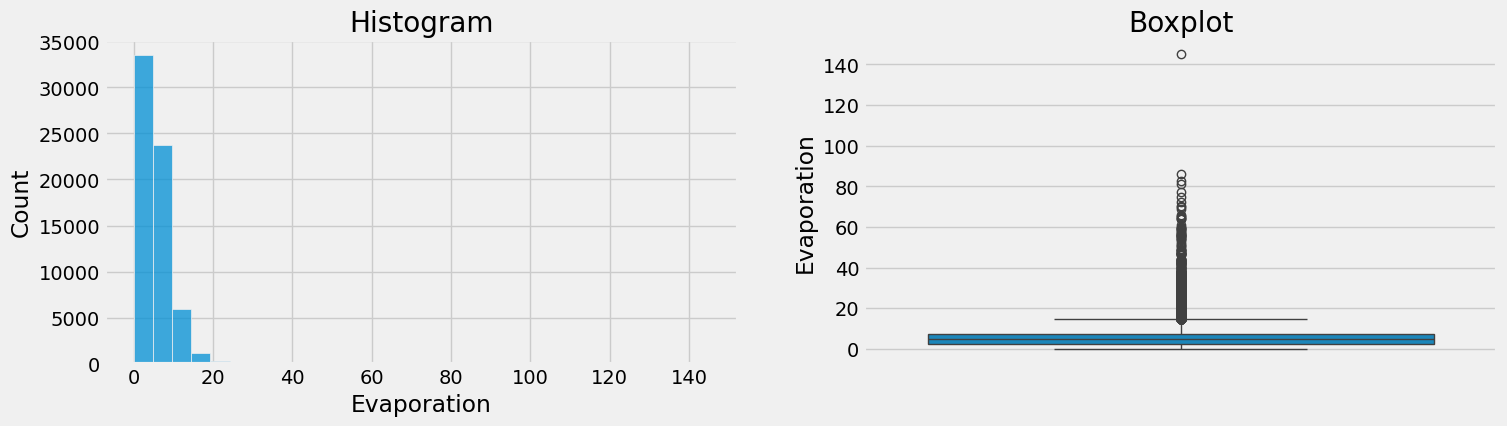

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


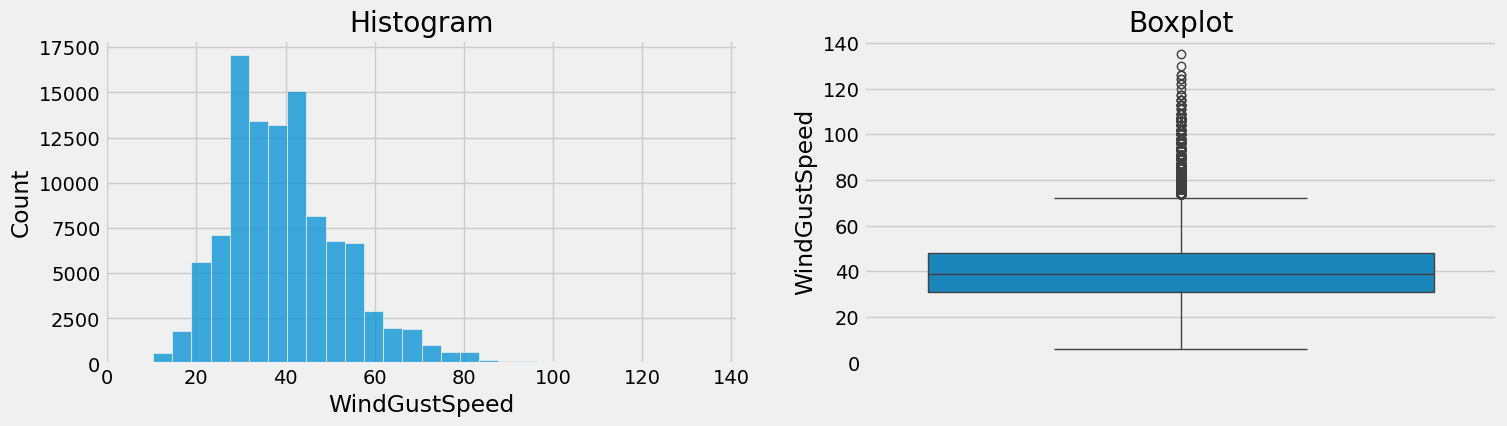

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


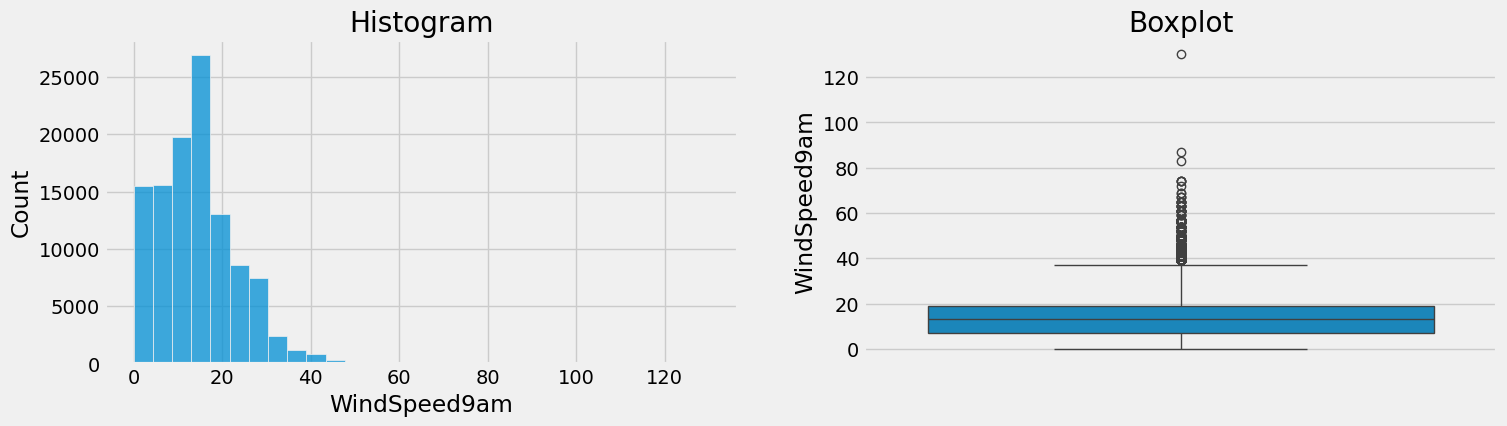

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


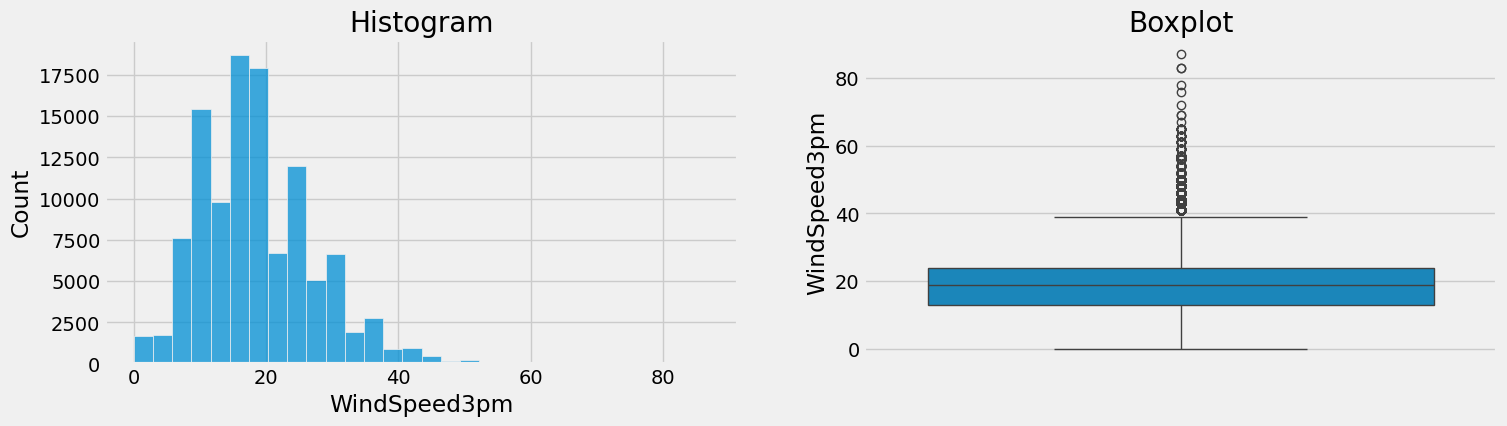

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


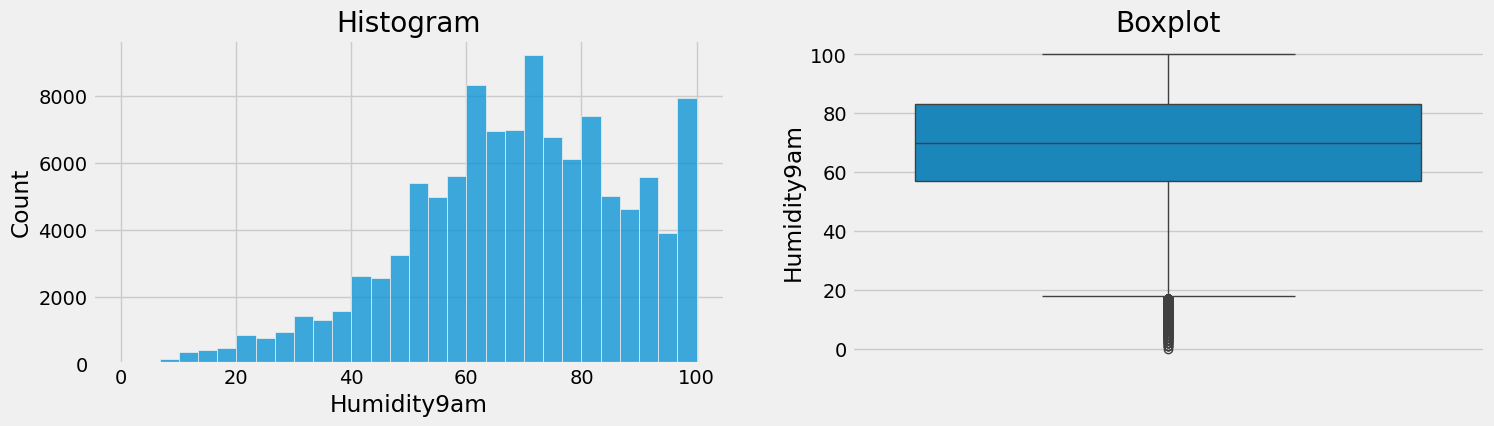

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


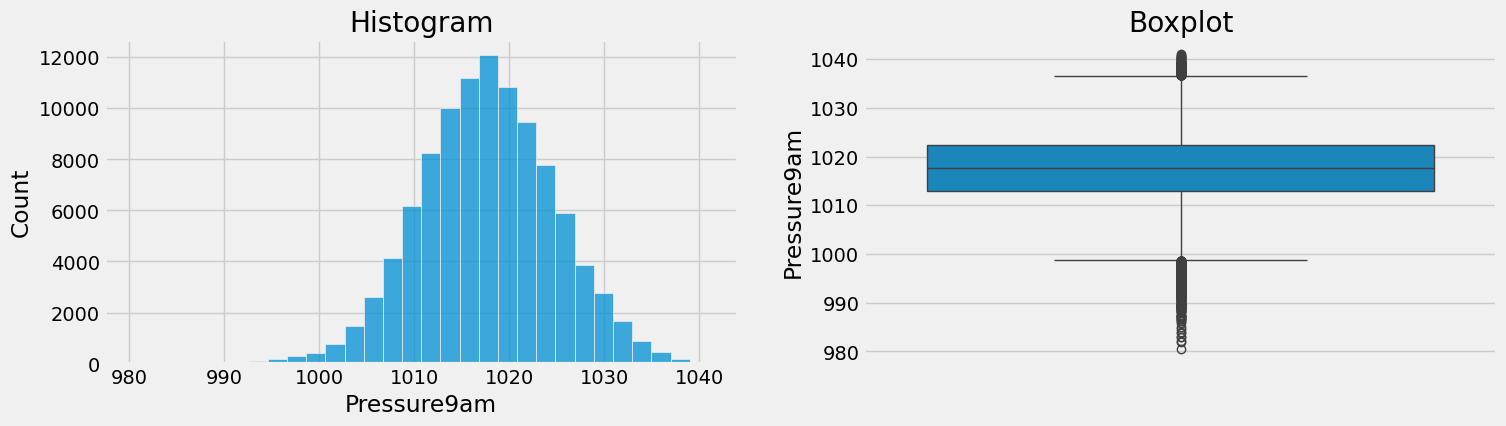

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


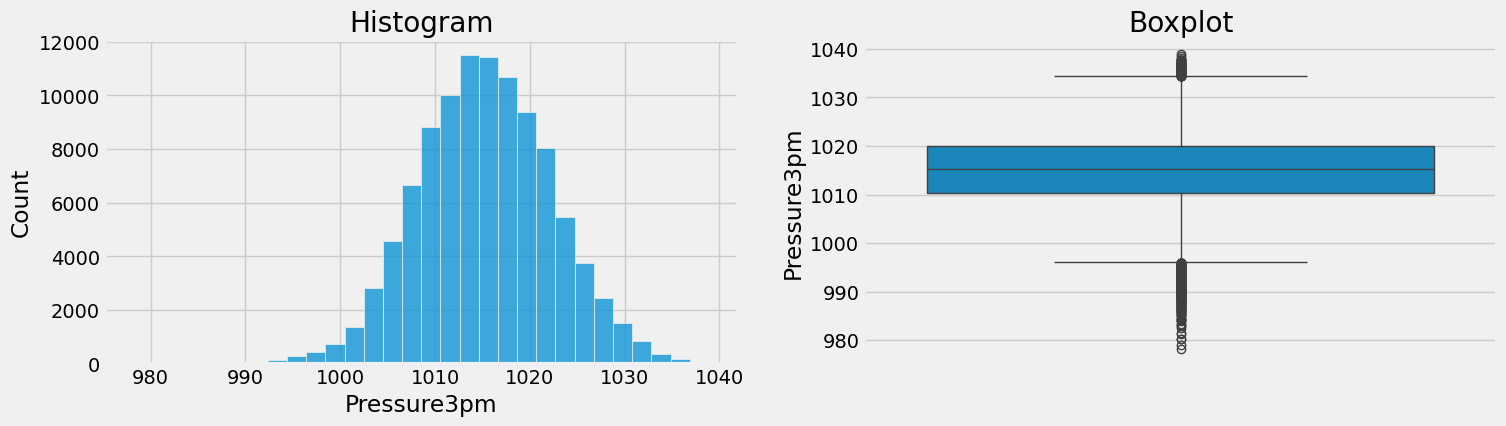

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


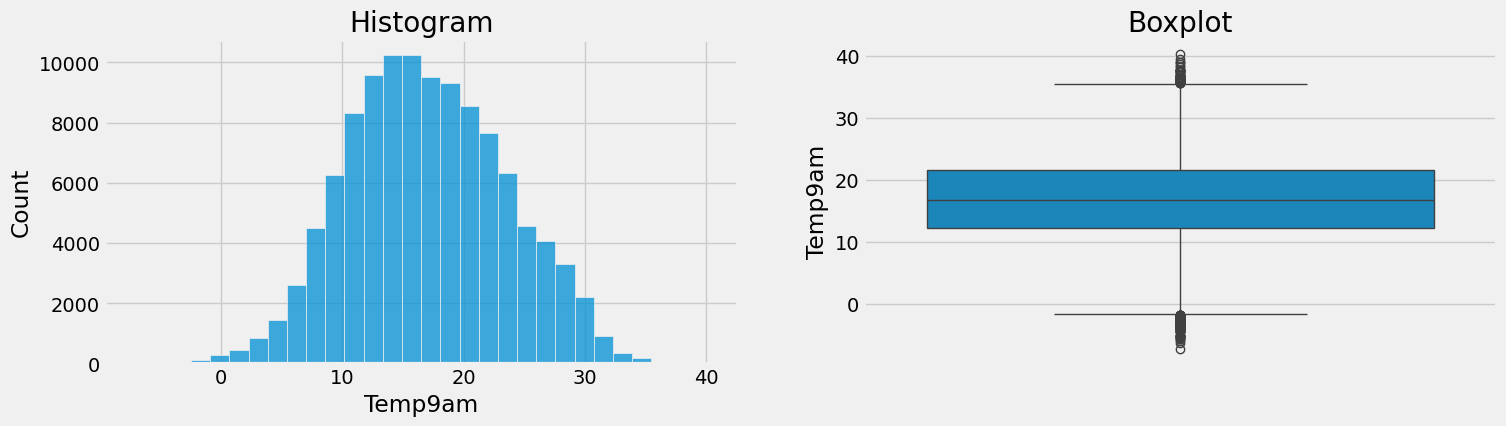

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


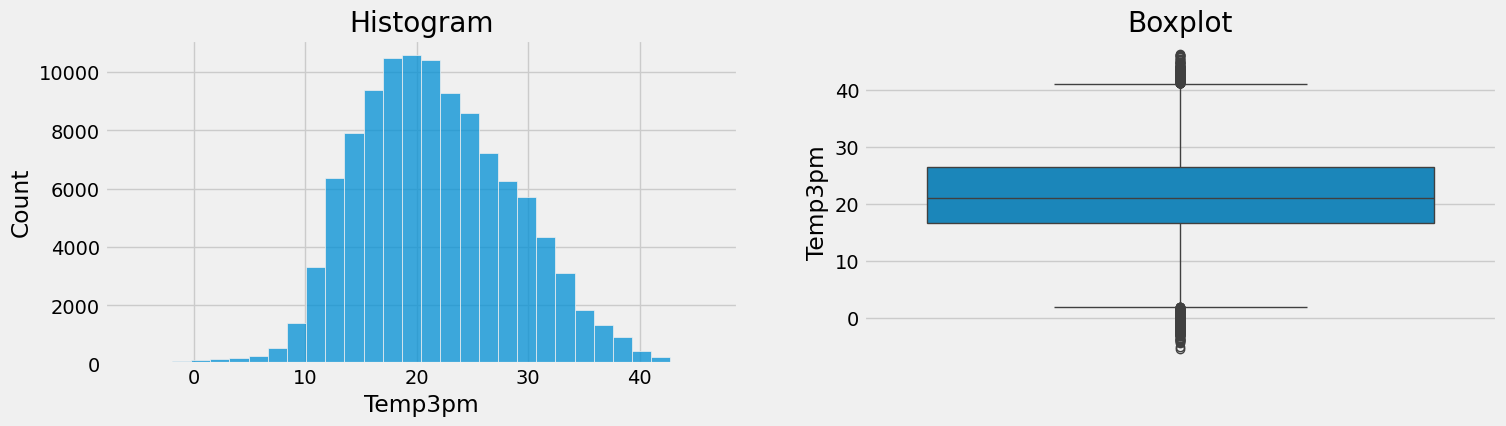

In [ ]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier
dengan presentase outlier sama dengan dan dibawah 3%

olumn Evaporation outliers = 1.40%
Column WindGustSpeed outliers = 2.07%
Column WindSpeed9am outliers = 1.62%
Column WindSpeed3pm outliers = 1.69%
Column Humidity9am outliers = 1.16%
Column Pressure9am outliers = 0.84%
Column Pressure3pm outliers = 0.67%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.50%

'''

diagnostic_plots(X_train, 'Evaporation')
diagnostic_plots(X_train, 'WindGustSpeed')
diagnostic_plots(X_train, 'WindSpeed9am')
diagnostic_plots(X_train, 'WindSpeed3pm')
diagnostic_plots(X_train, 'Humidity9am')
diagnostic_plots(X_train, 'Pressure9am')
diagnostic_plots(X_train, 'Pressure3pm')
diagnostic_plots(X_train, 'Temp9am')
diagnostic_plots(X_train, 'Temp3pm')

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Limits for `Evaporation`
Evaporation_upper_limit, Evaporation_lower_limit = find_skewed_boundaries(X_train, 'Evaporation', 1.5)
Evaporation_upper_limit, Evaporation_lower_limit

# Limits for `WindGustSpeed`
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit = find_skewed_boundaries(X_train, 'WindGustSpeed', 1.5)
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit

# Limits for `WindSpeed9am`
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit = find_skewed_boundaries(X_train, 'WindSpeed9am', 1.5)
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit

# Limits for `WindSpeed3pm`
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit = find_skewed_boundaries(X_train, 'WindSpeed3pm', 1.5)
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit

# Limits for `Humidity9am`
Humidity9am_upper_limit, Humidity9am_lower_limit = find_skewed_boundaries(X_train, 'Humidity9am', 1.5)
Humidity9am_upper_limit, Humidity9am_lower_limit

# Limits for `Pressure9am`
Pressure9am_upper_limit, Pressure9am_lower_limit = find_skewed_boundaries(X_train, 'Pressure9am', 1.5)
Pressure9am_upper_limit, Pressure9am_lower_limit

# Limits for `Pressure3pm`
Pressure3pm_upper_limit, Pressure3pm_lower_limit = find_skewed_boundaries(X_train, 'Pressure3pm', 1.5)
Pressure3pm_upper_limit, Pressure3pm_lower_limit

# Limits for `Temp9am`
Temp9am_upper_limit, Temp9am_lower_limit = find_skewed_boundaries(X_train, 'Temp9am', 1.5)
Temp9am_upper_limit, Temp9am_lower_limit

# Limits for `Temp3pm`
Temp3pm_upper_limit, Temp3pm_lower_limit = find_skewed_boundaries(X_train, 'Temp3pm', 1.5)
Temp3pm_upper_limit, Temp3pm_lower_limit


print('Evaporation_upper_limit : ', Evaporation_upper_limit)
print('Evaporation_lower_limit : ', Evaporation_lower_limit, '\n')
print('WindGustSpeed_upper_limit : ', WindGustSpeed_upper_limit)
print('WindGustSpeed_lower_limit : ', WindGustSpeed_lower_limit, '\n')
print('WindSpeed9am_upper_limit : ', WindSpeed9am_upper_limit)
print('WindSpeed9am_lower_limit : ', WindSpeed9am_lower_limit, '\n')
print('WindSpeed3pm_upper_limit : ', WindSpeed3pm_upper_limit)
print('WindSpeed3pm_lower_limit : ', WindSpeed3pm_lower_limit, '\n')
print('Humidity9am_upper_limit : ', Humidity9am_upper_limit)
print('Humidity9am_lower_limit : ', Humidity9am_lower_limit, '\n')
print('Pressure9am_upper_limit : ', Pressure9am_upper_limit)
print('Pressure9am_lower_limit : ', Pressure9am_lower_limit, '\n')
print('Pressure3pm_upper_limit : ', Pressure3pm_upper_limit)
print('Pressure3pm_lower_limit : ', Pressure3pm_lower_limit, '\n')
print('Temp9am_upper_limit : ', Temp9am_upper_limit)
print('Temp9am_lower_limit : ', Temp9am_lower_limit, '\n')
print('Temp3pm_upper_limit : ', Temp3pm_upper_limit)
print('Temp3pm_lower_limit : ', Temp3pm_lower_limit)

Evaporation_upper_limit :  14.600000000000001
Evaporation_lower_limit :  -4.600000000000001 

WindGustSpeed_upper_limit :  73.5
WindGustSpeed_lower_limit :  5.5 

WindSpeed9am_upper_limit :  37.0
WindSpeed9am_lower_limit :  -11.0 

WindSpeed3pm_upper_limit :  40.5
WindSpeed3pm_lower_limit :  -3.5 

Humidity9am_upper_limit :  122.0
Humidity9am_lower_limit :  18.0 

Pressure9am_upper_limit :  1036.65
Pressure9am_lower_limit :  998.65 

Pressure3pm_upper_limit :  1034.4
Pressure3pm_lower_limit :  996.0 

Temp9am_upper_limit :  35.550000000000004
Temp9am_lower_limit :  -1.6500000000000004 

Temp3pm_upper_limit :  41.099999999999994
Temp3pm_lower_limit :  1.9000000000000057


In [ ]:
index_drop_train = X_train.index[X_train['Evaporation'] > Evaporation_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

In [ ]:
index_drop_train = X_train.index[X_train['WindGustSpeed'] > WindGustSpeed_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

In [ ]:
index_drop_train = X_train.index[X_train['Humidity9am'] > Humidity9am_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

In [ ]:
index_drop_train = X_train.index[X_train['Humidity3pm'] > Humidity9am_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

In [ ]:
index_drop_train = X_train.index[X_train['Pressure9am'] > Pressure9am_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

In [ ]:
index_drop_train = X_train.index[X_train['Pressure3pm'] > Pressure3pm_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

In [ ]:
index_drop_train = X_train.index[X_train['Temp3pm'] > Temp9am_upper_limit]
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())

#####Trimming X_test

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


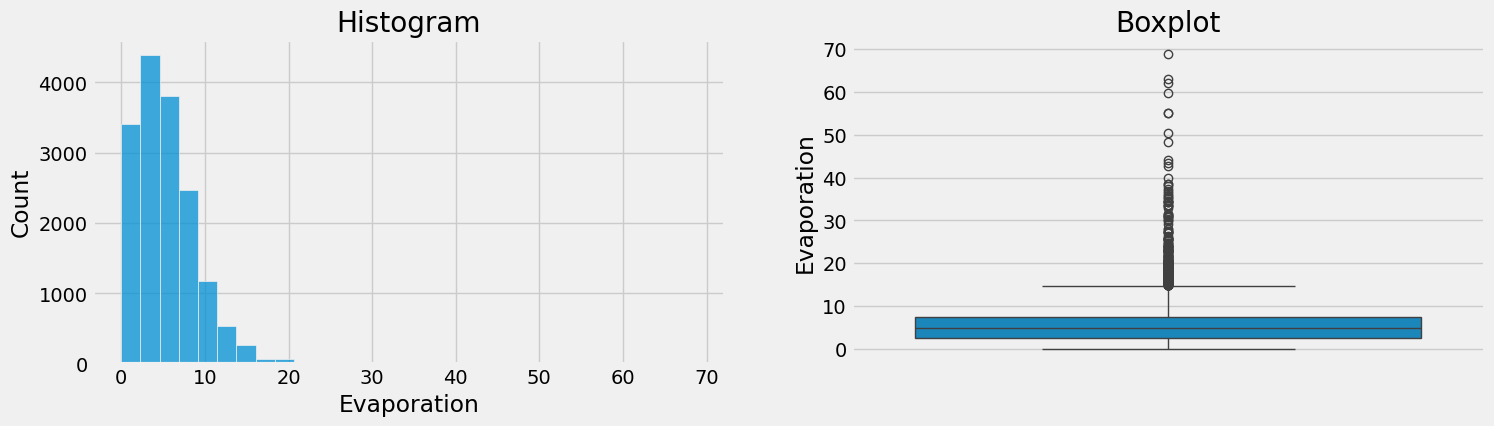

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


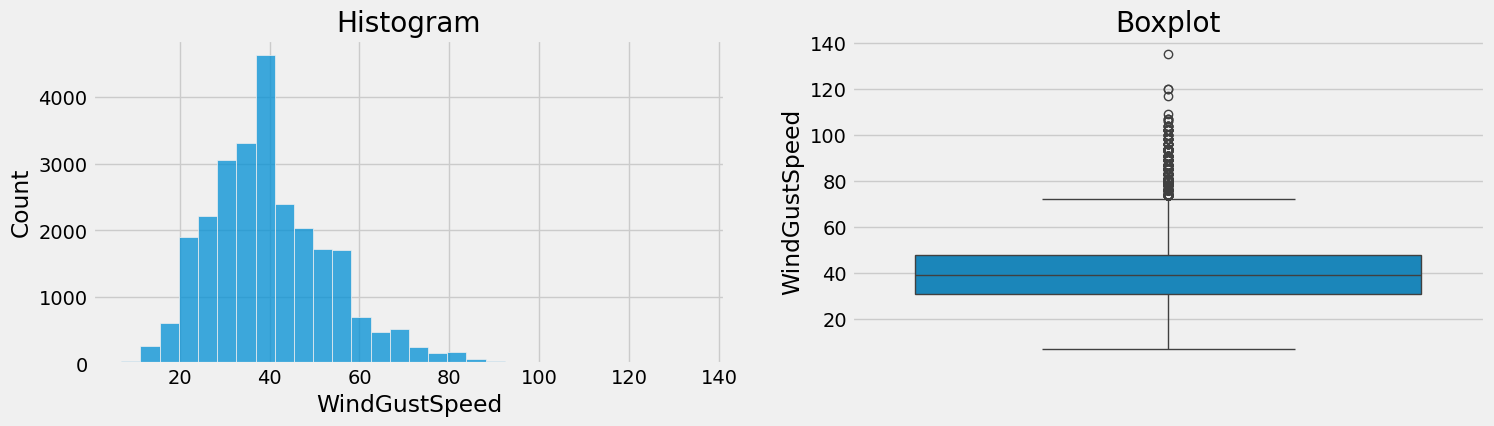

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


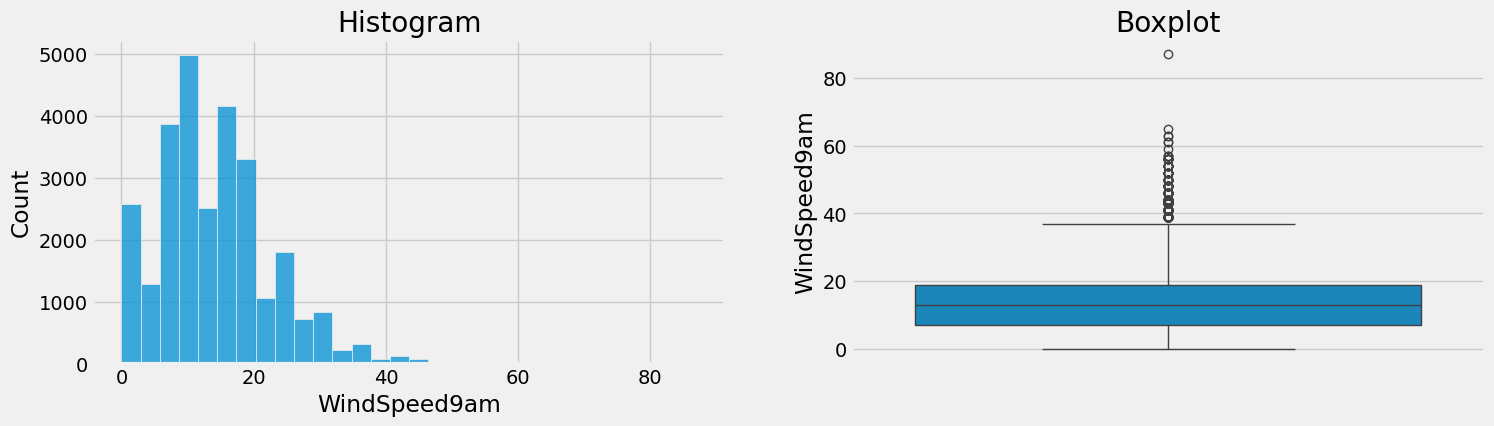

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


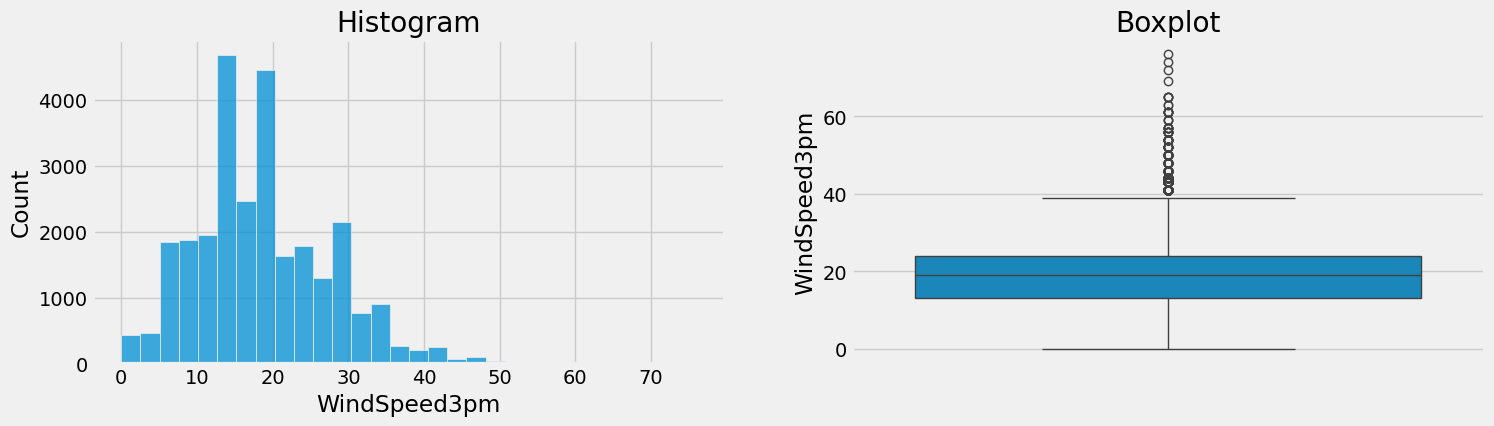

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


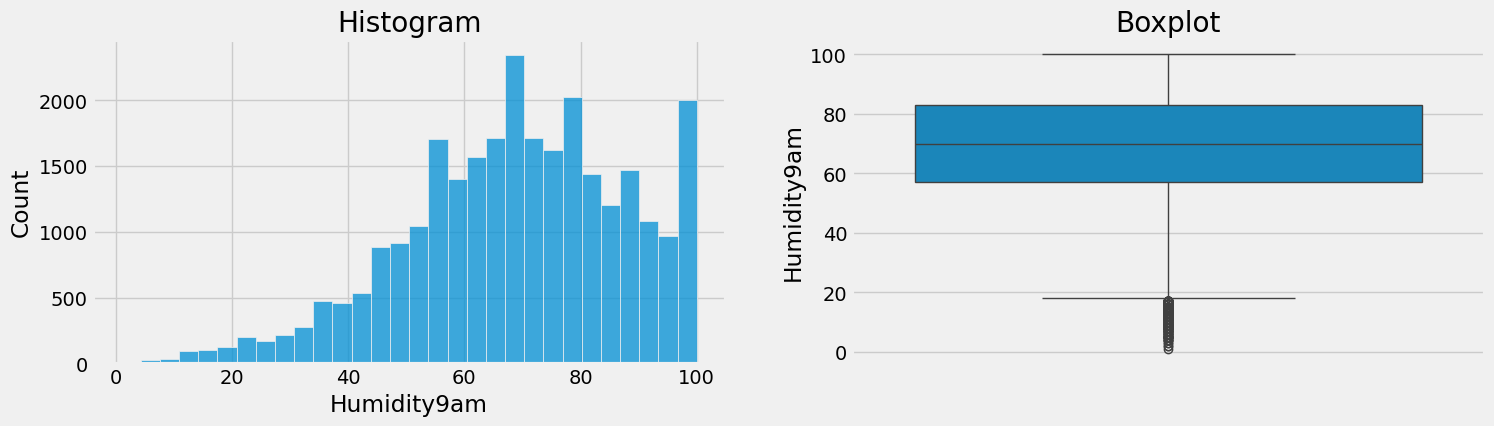

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


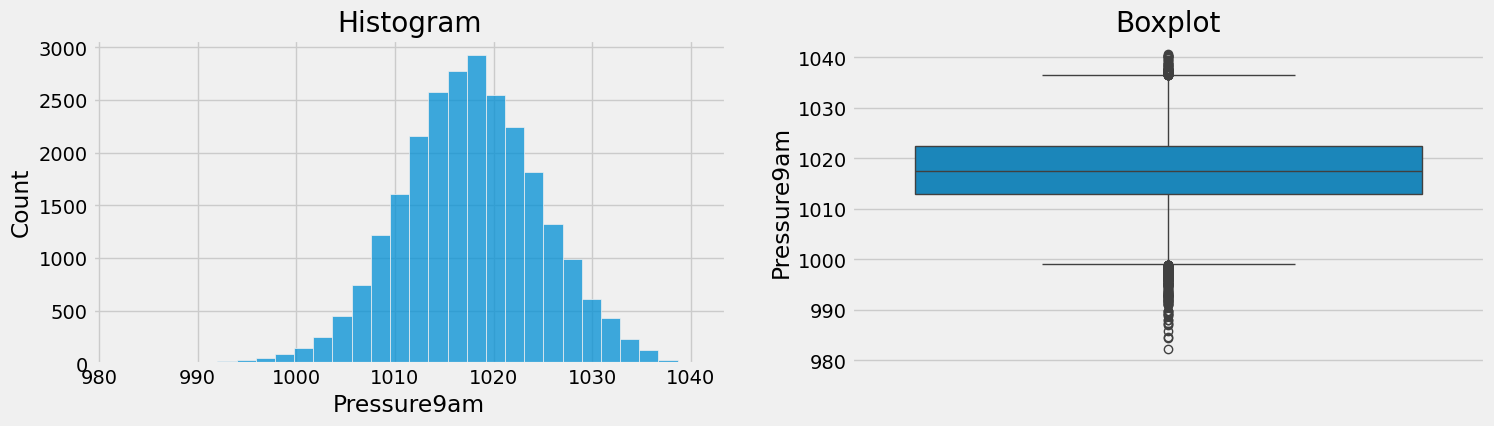

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


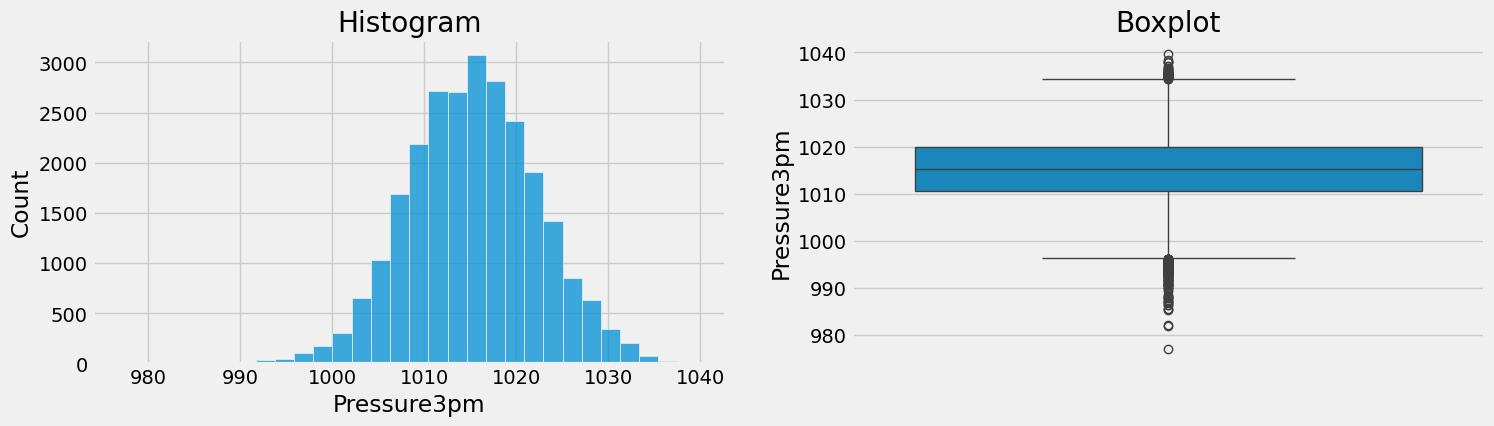

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


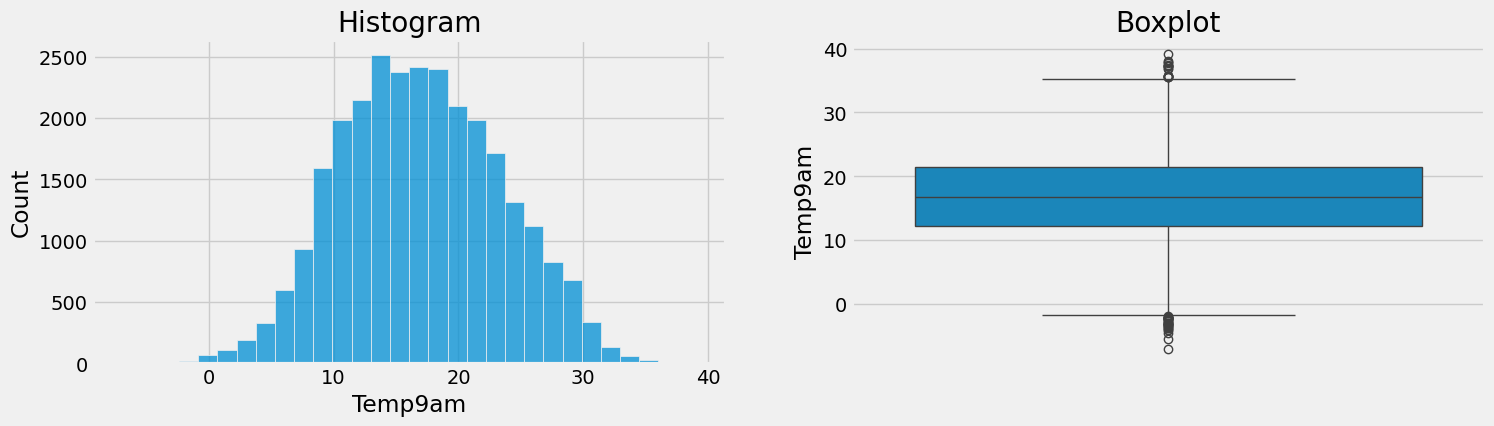

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


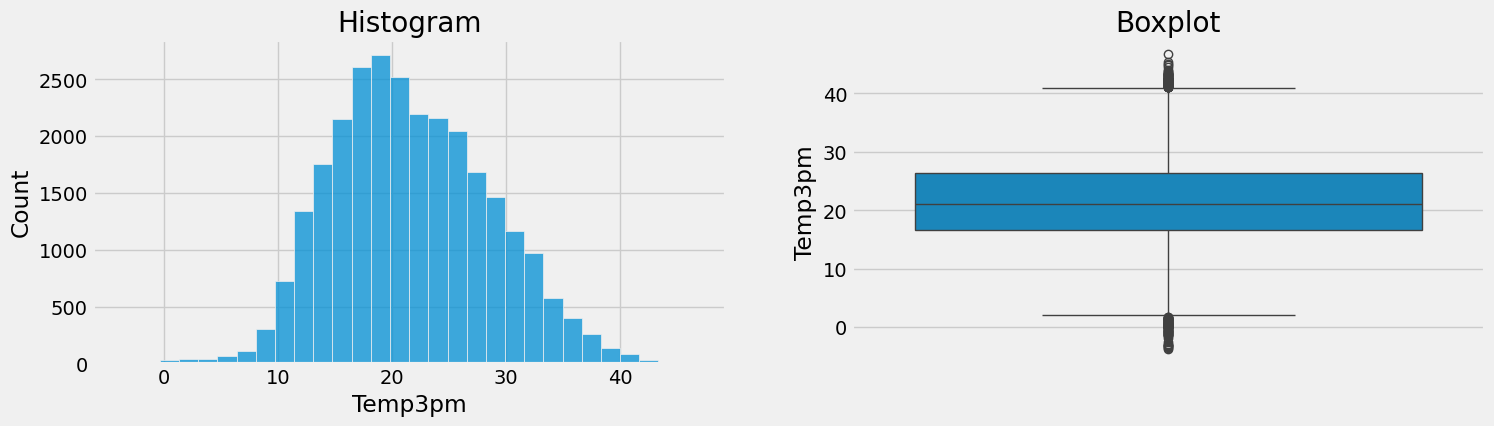

In [ ]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier
dengan presentase outlier sama dengan dan dibawah 3%

olumn Evaporation outliers = 1.40%
Column WindGustSpeed outliers = 2.07%
Column WindSpeed9am outliers = 1.62%
Column WindSpeed3pm outliers = 1.69%
Column Humidity9am outliers = 1.16%
Column Pressure9am outliers = 0.84%
Column Pressure3pm outliers = 0.67%
Column Temp9am outliers = 0.17%
Column Temp3pm outliers = 0.50%

'''

diagnostic_plots(X_test, 'Evaporation')
diagnostic_plots(X_test, 'WindGustSpeed')
diagnostic_plots(X_test, 'WindSpeed9am')
diagnostic_plots(X_test, 'WindSpeed3pm')
diagnostic_plots(X_test, 'Humidity9am')
diagnostic_plots(X_test, 'Pressure9am')
diagnostic_plots(X_test, 'Pressure3pm')
diagnostic_plots(X_test, 'Temp9am')
diagnostic_plots(X_test, 'Temp3pm')

In [ ]:
# Limits for `Evaporation`
Evaporation_upper_limit, Evaporation_lower_limit = find_skewed_boundaries(X_test, 'Evaporation', 1.5)
Evaporation_upper_limit, Evaporation_lower_limit

# Limits for `WindGustSpeed`
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit = find_skewed_boundaries(X_test, 'WindGustSpeed', 1.5)
WindGustSpeed_upper_limit, WindGustSpeed_lower_limit

# Limits for `WindSpeed9am`
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit = find_skewed_boundaries(X_test, 'WindSpeed9am', 1.5)
WindSpeed9am_upper_limit, WindSpeed9am_lower_limit

# Limits for `WindSpeed3pm`
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit = find_skewed_boundaries(X_test, 'WindSpeed3pm', 1.5)
WindSpeed3pm_upper_limit, WindSpeed3pm_lower_limit

# Limits for `Humidity9am`
Humidity9am_upper_limit, Humidity9am_lower_limit = find_skewed_boundaries(X_test, 'Humidity9am', 1.5)
Humidity9am_upper_limit, Humidity9am_lower_limit

# Limits for `Pressure9am`
Pressure9am_upper_limit, Pressure9am_lower_limit = find_skewed_boundaries(X_test, 'Pressure9am', 1.5)
Pressure9am_upper_limit, Pressure9am_lower_limit

# Limits for `Pressure3pm`
Pressure3pm_upper_limit, Pressure3pm_lower_limit = find_skewed_boundaries(X_test, 'Pressure3pm', 1.5)
Pressure3pm_upper_limit, Pressure3pm_lower_limit

# Limits for `Temp9am`
Temp9am_upper_limit, Temp9am_lower_limit = find_skewed_boundaries(X_test, 'Temp9am', 1.5)
Temp9am_upper_limit, Temp9am_lower_limit

# Limits for `Temp3pm`
Temp3pm_upper_limit, Temp3pm_lower_limit = find_skewed_boundaries(X_test, 'Temp3pm', 1.5)
Temp3pm_upper_limit, Temp3pm_lower_limit


print('Evaporation_upper_limit : ', Evaporation_upper_limit)
print('Evaporation_lower_limit : ', Evaporation_lower_limit, '\n')
print('WindGustSpeed_upper_limit : ', WindGustSpeed_upper_limit)
print('WindGustSpeed_lower_limit : ', WindGustSpeed_lower_limit, '\n')
print('WindSpeed9am_upper_limit : ', WindSpeed9am_upper_limit)
print('WindSpeed9am_lower_limit : ', WindSpeed9am_lower_limit, '\n')
print('WindSpeed3pm_upper_limit : ', WindSpeed3pm_upper_limit)
print('WindSpeed3pm_lower_limit : ', WindSpeed3pm_lower_limit, '\n')
print('Humidity9am_upper_limit : ', Humidity9am_upper_limit)
print('Humidity9am_lower_limit : ', Humidity9am_lower_limit, '\n')
print('Pressure9am_upper_limit : ', Pressure9am_upper_limit)
print('Pressure9am_lower_limit : ', Pressure9am_lower_limit, '\n')
print('Pressure3pm_upper_limit : ', Pressure3pm_upper_limit)
print('Pressure3pm_lower_limit : ', Pressure3pm_lower_limit, '\n')
print('Temp9am_upper_limit : ', Temp9am_upper_limit)
print('Temp9am_lower_limit : ', Temp9am_lower_limit, '\n')
print('Temp3pm_upper_limit : ', Temp3pm_upper_limit)
print('Temp3pm_lower_limit : ', Temp3pm_lower_limit)

Evaporation_upper_limit :  14.600000000000001
Evaporation_lower_limit :  -4.600000000000001 

WindGustSpeed_upper_limit :  73.5
WindGustSpeed_lower_limit :  5.5 

WindSpeed9am_upper_limit :  37.0
WindSpeed9am_lower_limit :  -11.0 

WindSpeed3pm_upper_limit :  40.5
WindSpeed3pm_lower_limit :  -3.5 

Humidity9am_upper_limit :  122.0
Humidity9am_lower_limit :  18.0 

Pressure9am_upper_limit :  1036.5
Pressure9am_lower_limit :  998.9000000000001 

Pressure3pm_upper_limit :  1034.3125
Pressure3pm_lower_limit :  996.2125000000001 

Temp9am_upper_limit :  35.45
Temp9am_lower_limit :  -1.7500000000000018 

Temp3pm_upper_limit :  41.075
Temp3pm_lower_limit :  2.0749999999999993


In [ ]:
index_drop_test = X_test.index[X_test['Evaporation'] > Evaporation_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

In [ ]:
index_drop_test = X_test.index[X_test['WindGustSpeed'] > WindGustSpeed_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

In [ ]:
index_drop_test = X_test.index[X_test['Humidity9am'] > Humidity9am_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

In [ ]:
index_drop_test = X_test.index[X_test['Humidity3pm'] > Humidity9am_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

In [ ]:
index_drop_test = X_test.index[X_test['Pressure9am'] > Pressure9am_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

In [ ]:
index_drop_test = X_test.index[X_test['Pressure3pm'] > Pressure3pm_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

In [ ]:
index_drop_test = X_test.index[X_test['Temp3pm'] > Temp9am_upper_limit]
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())

###3.6 HANDLING (IMPUTATION) MISSING VALUE

In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
X_train.

'''

mv_train = pd.DataFrame(X_train.isnull().sum(), columns=['No. of missing values'])
mv_train['% missing_values'] = (mv_train/len(X_train)).round(2)*100
mv_train

No. of missing values  % missing_values
Location                           0               0.0
Rainfall                           0               0.0
Evaporation                    45573              43.0
WindGustDir                        0               0.0
WindGustSpeed                   7188               7.0
WindDir9am                         0               0.0
WindDir3pm                         0               0.0
WindSpeed9am                     820               1.0
WindSpeed3pm                    1991               2.0
Humidity9am                     1143               1.0
Humidity3pm                     2719               3.0
Pressure9am                    10652              10.0
Pressure3pm                    10674              10.0
Cloud9am                       39686              38.0
Cloud3pm                       42443              40.0
Temp9am                          489               0.0
Temp3pm                         2055               2.0
RainToday                          0               0.0
RISK_MM                            0               0.0
Month                              0               0.0

In [ ]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
X_test.

'''

mv_test = pd.DataFrame(X_test.isnull().sum(), columns=['No. of missing values'])
mv_test['% missing_values'] = (mv_test/len(X_test)).round(2)*100
mv_test

No. of missing values  % missing_values
Location                           0               0.0
Rainfall                           0               0.0
Evaporation                    11285              43.0
WindGustDir                        0               0.0
WindGustSpeed                   1791               7.0
WindDir9am                         0               0.0
WindDir3pm                         0               0.0
WindSpeed9am                     210               1.0
WindSpeed3pm                     499               2.0
Humidity9am                      286               1.0
Humidity3pm                      661               3.0
Pressure9am                     2582              10.0
Pressure3pm                     2584              10.0
Cloud9am                        9898              37.0
Cloud3pm                       10595              40.0
Temp9am                          136               1.0
Temp3pm                          511               2.0
RainToday                          0               0.0
RISK_MM                            0               0.0
Month                              0               0.0

Missing value hanya akan dihandle pada fitur yang dipilih, dan akan digunakan untuk melatih model dan menguji performa model

**Dari hasil matriks korelasi terlihat bahwa Humidity3pm, Cloud3pm, Cloud9am, Humidity9am, RainFall, Pressure3pm, Pressure9am, WindGustSpeed, Temp3pm & Evaporation merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (RainTomorrow) dibandingkan variabel lainnya. Sehingga saya memutuskan untuk menggunakan 10 fitur numerik ini karena memiliki nilai korelasi tertinggi terhadap target.**

In [ ]:
num_feature_train = X_train[num_cols].loc[:, ['Humidity3pm', 'Humidity9am', 'Cloud3pm', 'Cloud9am', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Temp3pm', 'Evaporation', 'Rainfall']]
num_feature_test = X_test[num_cols].loc[:, ['Humidity3pm', 'Humidity9am', 'Cloud3pm', 'Cloud9am', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'Temp3pm', 'Evaporation', 'Rainfall']]

X_train_num = num_feature_train
X_test_num = num_feature_test

print(X_train_num.isna().sum())
print(X_test_num.isna().sum())

Humidity3pm       2719
Humidity9am       1143
Cloud3pm         42443
Cloud9am         39686
Pressure9am      10652
Pressure3pm      10674
WindGustSpeed     7188
Temp3pm           2055
Evaporation      45573
Rainfall             0
dtype: int64
Humidity3pm        661
Humidity9am        286
Cloud3pm         10595
Cloud9am          9898
Pressure9am       2582
Pressure3pm       2584
WindGustSpeed     1791
Temp3pm            511
Evaporation      11285
Rainfall             0
dtype: int64


Based on distribusi data variabel Evaporation dan Rainfall distribusi miring/skewed sehingga imputasi missing value-nya menggunakan median. Variabel lainnya memiliki distribusi data normal dan bimodel sehingga imputasinnya menggunakan mean.

In [ ]:
# Impute missing values for numerical features in train using median
median_values_train = X_train_num[['Evaporation', 'Rainfall']].median()
X_train_num = X_train_num.fillna(value=median_values_train)
X_train_num.isna().sum()

Humidity3pm       2719
Humidity9am       1143
Cloud3pm         42443
Cloud9am         39686
Pressure9am      10652
Pressure3pm      10674
WindGustSpeed     7188
Temp3pm           2055
Evaporation          0
Rainfall             0
dtype: int64

In [ ]:
# Impute missing values for numerical features in train using mean
mean_values_train = X_train_num[['Humidity3pm', 'Humidity9am', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'WindGustSpeed', 'Temp3pm']].mean()
X_train_num = X_train_num.fillna(value=mean_values_train)
X_train_num.isna().sum()

Humidity3pm      0
Humidity9am      0
Cloud3pm         0
Cloud9am         0
Pressure9am      0
Pressure3pm      0
WindGustSpeed    0
Temp3pm          0
Evaporation      0
Rainfall         0
dtype: int64

In [ ]:
# Impute missing values for numerical features in test using median
median_values_test = X_test_num[['Evaporation', 'Rainfall']].median()
X_test_num = X_test_num.fillna(value=median_values_test)
X_test_num.isna().sum()

Humidity3pm        661
Humidity9am        286
Cloud3pm         10595
Cloud9am          9898
Pressure9am       2582
Pressure3pm       2584
WindGustSpeed     1791
Temp3pm            511
Evaporation          0
Rainfall             0
dtype: int64

In [ ]:
# Impute missing values for numerical features in train using mean
mean_values_train = X_test_num[['Humidity3pm', 'Humidity9am', 'Cloud9am', 'Cloud3pm', 'Pressure3pm', 'Pressure9am', 'WindGustSpeed', 'Temp3pm']].mean()
X_test_num = X_test_num.fillna(value=mean_values_train)
X_test_num.isna().sum()

Humidity3pm      0
Humidity9am      0
Cloud3pm         0
Cloud9am         0
Pressure9am      0
Pressure3pm      0
WindGustSpeed    0
Temp3pm          0
Evaporation      0
Rainfall         0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

**Saya memutuskan untuk menggunakan hanya tiga fitur pada fitur kategorik, yaitu Location, Month dan RainToday. Dikarenakan berdasarkan hasil analisis pada EDA terlihat bahwa kemungkinan turunnya hujan besok lebih besar jika terjadi hujan pada hari ini. Dan Lokasi turunnya hujan menjadi penentu besar kecilnya turun hujan di besok hari, karena berdasarkan hasil analisis EDA ada beberapa lokasi yang memiliki intensitas turun hujan lebih sering. Disamping itu di bulan tertentu hujan lebih sering turun.**

In [ ]:
cat_feature_train = X_train[cat_cols].loc[:, ['Location', 'RainToday', 'Month']]
cat_feature_test = X_test[cat_cols].loc[:, ['Location', 'RainToday', 'Month']]

X_train_cat = cat_feature_train
X_test_cat = cat_feature_test

print(X_train_cat.isna().sum())
print(X_test_cat.isna().sum())

Location     0
RainToday    0
Month        0
dtype: int64
Location     0
RainToday    0
Month        0
dtype: int64


Tidak terdapat missing value pada fitur kategorik

In [ ]:
processed_data_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train = processed_data_train
X_train

array([[ 2.15541712e+00,  1.17057478e+00,  1.65486601e+00, ...,
         2.80000000e+01,  1.00000000e+00,  7.00000000e+00],
       [ 2.35875589e+00,  1.56114200e+00, -4.22767888e-16, ...,
         2.30000000e+01,  1.00000000e+00,  2.00000000e+00],
       [ 1.44373142e+00,  1.00318883e+00,  1.65486601e+00, ...,
         3.00000000e+00,  1.00000000e+00,  8.00000000e+00],
       ...,
       [-8.43829755e-01, -7.26466005e-01, -2.15308859e+00, ...,
         3.20000000e+01,  0.00000000e+00,  8.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -4.22767888e-16, ...,
         4.00000000e+00,  0.00000000e+00,  6.00000000e+00],
       [-4.87986905e-01, -1.68512833e-01, -4.22767888e-16, ...,
         4.00000000e+01,  0.00000000e+00,  6.00000000e+00]])

In [ ]:
processed_data_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test = processed_data_test
X_test

array([[ 4.77872259e-01,  8.91598193e-01,  1.03716240e-02, ...,
         1.20000000e+01,  0.00000000e+00,  4.00000000e+00],
       [ 5.79541645e-01, -1.11703323e+00,  1.03716240e-02, ...,
         4.70000000e+01,  0.00000000e+00,  1.00000000e+01],
       [ 6.30376337e-01,  2.77849704e-01,  1.03716240e-02, ...,
         4.00000000e+00,  0.00000000e+00,  4.00000000e+00],
       ...,
       [-3.35482826e-01,  1.10463753e-01, -7.25105616e-01, ...,
         2.90000000e+01,  1.00000000e+00,  1.10000000e+01],
       [ 1.29122734e+00, -2.34453020e+00,  1.17887169e+00, ...,
         3.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-8.13093623e-02,  6.68416924e-01,  1.65486601e+00, ...,
         2.10000000e+01,  0.00000000e+00,  9.00000000e+00]])

##4. Model Development

###4.1 Pipeline & Parameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())])

pipe_dt = Pipeline([
('scaler', StandardScaler()),
('classifier', DecisionTreeClassifier())])

#Random Forest
param_rf = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]
            }

param_dt = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__learning_rate':[0.1,0.01,0.001],
            'classifier__min_samples_split': [50, 100, 200],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__max_depth': [8, 10, 12],
            'classifier__max_features': [2, 3]
            }

###4.2 Train Model without Tunning

#####4.2.1 Random Forest

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.9999
Testing Score:  0.8552


In [ ]:
y_rf_pred = pipe_rf.predict(X_test)

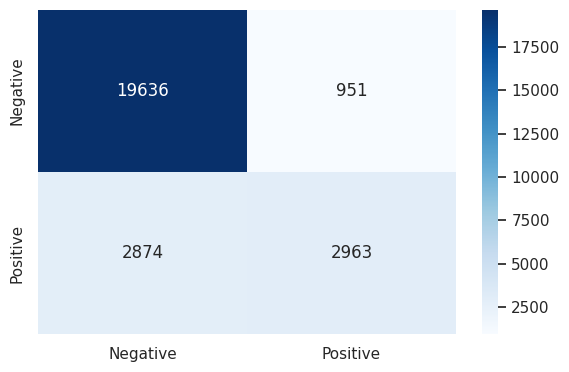

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 19636 dan 951 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 2963 dan 2874 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     20587
           1       0.76      0.51      0.61      5837

    accuracy                           0.86     26424
   macro avg       0.81      0.73      0.76     26424
weighted avg       0.85      0.86      0.84     26424



#####4.2.2 Decision Tree

In [ ]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9999
Testing Score:  0.7803


In [ ]:
y_dt_pred = pipe_dt.predict(X_test)

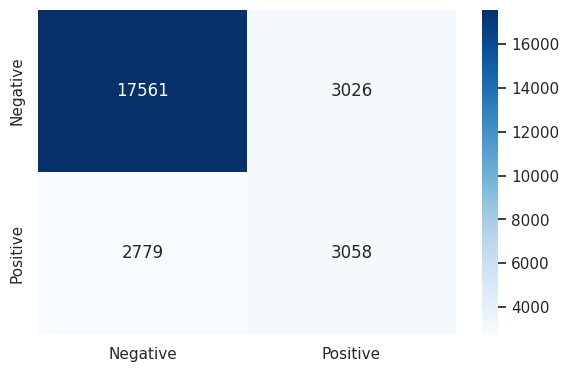

In [ ]:
cf_matrix_dt = confusion_matrix(y_test, y_dt_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_dt, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 17561 dan 3026 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi RainTomorrow pada data test terprediksi benar sebanyak 3058 dan 2779 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     20587
           1       0.50      0.52      0.51      5837

    accuracy                           0.78     26424
   macro avg       0.68      0.69      0.69     26424
weighted avg       0.78      0.78      0.78     26424



###4.3 Train Model with Tunning

#####4.3.1 Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_rf.score(X_train, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

In [ ]:
# Cek confusion matrix
cf_matrix_rf = confusion_matrix(y_test, best_pipe_rf.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

#####4.3.2 Decision Tree

In [ ]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [ ]:
print('Training set score: ' + str(grid_dt.score(X_train, y_train)))
print('Test set score: ' + str(grid_dt.score(X_test, y_test)))

In [ ]:
# Cek confusion matrix
cf_matrix_dt = confusion_matrix(y_test, best_pipe_dt.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_dt, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

In [ ]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

#5. Model Evaluation

In [ ]:
rf_notun = pipe_rf.score(X_test, y_test)
rf_tun = grid_rf.score(X_test, y_test)
dt_notun = pipe_dt.score(X_test, y_test)
dt_tun = grid_dt.score(X_test, y_test)

In [ ]:
print(round(rf_notun, 4))
print(round(rf_tun, 4))
print(round(dt_notun, 4))
print(round(dt_tun, 4))

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [rf_notun, rf_tun, dt_notun, dt_tun]
model_name = ['RandomForest Notun', 'RandomForest Tunning', 'DecisionTree Notun', 'DecisionTree Tunning']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [ ]:
from sklearn.metrics import f1_score, recall_score, precission_score

models = {
    'rf_notun': pipe_rf,
    'rf_tun': best_pipe_rf,
    'dt_notun': pipe_ada,
    'dt_tun': best_pipe_ada
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score,
    'precission':precission_score
}

hrt_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall', 'precission'])

for metric in metrics.keys():
    for model in models.keys():
        hrt_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))